In [16]:
import io
import pandas as pd
import seaborn as sns


In [17]:
import pandas as pd

df = pd.read_excel('Delivery truck trip data.xlsx')


In [18]:
df.describe(include='object')

GpsProvider           BookingID Market/Regular   vehicle_no  \
count            5927                6880            6880        6880   
unique             29                6875               2        2325   
top     CONSENT TRACK  MVCV0000798/082021         Regular  TS15UC9341   
freq             3859                   3            6811          37   

                             Origin_Location  \
count                                   6880   
unique                                   180   
top     Mugabala, Bangalore Rural, Karnataka   
freq                                     572   

                                     Destination_Location  \
count                                                6880   
unique                                                520   
top     DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...   
freq                                                  342   

                                  Org_lat_lon      Des_lat_lon  \
count                                    6880             6880   
unique                                    173              522   
top     16.560192249175344,80.792293091599547  12.8390,79.9540   
freq                                     1189              342   

                                         Current_Location  \
count                                                5916   
unique                                               2567   
top     Perumalpattu - Kottamedu Rd, Oragadam Industri...   
freq                                                  198   

                                      DestinationLocation  ...  \
count                                                6880  ...   
unique                                                520  ...   
top     DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...  ...   
freq                                                  342  ...   

       OriginLocation_Code DestinationLocation_Code             vehicleType  \
count                 6877                     6853                    6052   
unique                 178                      478                      44   
top              V0048673             CHEMMNFILCCA1  40 FT 3XL Trailer 35MT   
freq                  1186                      259                    2575   

       Driver_Name  customerID         customerNameCode supplierID  \
count         3451        6880                     6880       6880   
unique        1355          39                       39        321   
top           MANU  LTLEXMUM40  Larsen & toubro limited        999   
freq            60        4092                     4092        742   

       supplierNameCode  Material Shipped     Curr_lat_lon  
count              6880              6880             5927  
unique              309              1407             3887  
top             Unknown        AUTO PARTS  17.4634,78.1978  
freq                742              1510               33  

[4 rows x 22 columns]

## **Machine Learning**



### 1. Clustering 

We have implemented clustering using the sklearn KMeans module  and using the np.linalg.norm iterative calculation method

In [19]:
#importing all the packages to run the clustering algorithm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [20]:
#creating a new dataframe which consists of the relevant columns for our cluster analysis
Locations = df[['Origin_Location','Destination_Location','Org_lat_lon','Des_lat_lon','Curr_lat_lon','Curr_lon',
                'Curr_lat','Current_Location','DestinationLocation']]

In [21]:
#appending the current, Origin and Destination of each of the trucks that are on a delivery route
L_list = Locations['Org_lat_lon'].tolist()
L_list.extend(Locations['Des_lat_lon'].tolist())
L_list.extend(Locations['Curr_lat_lon'].tolist())

In [22]:
#handling NULL values in the data
Locations_list = []
for i in L_list:
    if i not in Locations_list:
      if i != 'nan':
        Locations_list.append(i)
      else:
        print(i)

Location_df = pd.DataFrame(Locations_list,columns=["Locations"])

In [23]:
#splitting the comma separated values into Latitude and Longitude
Location_df[["Locations_lat","Locations_lon"]]=Location_df['Locations'].str.split(',', expand=True)
#Location_df
#len(Locations_list)

In [24]:
#converting the values read in string to float so that they can be used to plot coordinates on the map
Lat = np.array(Location_df["Locations_lat"].tolist())
Latitudes = np.asarray(Lat, dtype=np.float64, order='C')
Lon = np.array(Location_df["Locations_lon"].tolist())
Longitudes = np.asarray(Lon, dtype=np.float64, order='C')

#Stacking the list of Latitudes and Longitudes into a single 2 dimensional matrix
Cords = np.vstack((Latitudes,Longitudes))
#len(Cords[0])

In [25]:
#reshaping the cords matrix to appropriately input the data into the cluster
Coordinates = []
for i in range(len(Cords[0])):
    l = []
    if(not np.isnan(Cords[0][i]) and not np.isnan(Cords[0][i])):
        l.append(Cords[0][i])
        l.append(Cords[1][i])
        Coordinates.append(l)
        
Coordinates = np.array(Coordinates)

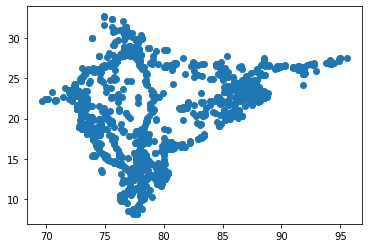

In [26]:
#plotting the coordinates before clustering
plt.scatter(Coordinates[:,1], Coordinates[:,0])
plt.show()

In [27]:
#we would like to divide the data into 4 zones
num_of_clusters=4

Kmean = KMeans(n_clusters=num_of_clusters)
Kmean.fit(Coordinates)
centers= Kmean.cluster_centers_

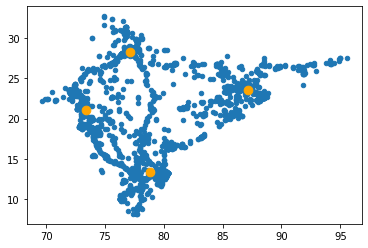

In [28]:
#Displaying the centers of the clusters calculated from K-Means model under the scikit-learn package
plt.scatter(Coordinates[ : , 1], Coordinates[ : , 0], s =20)
for i in range(num_of_clusters):
    plt.scatter(centers[i][1], centers[i][0], s=75, c='orange')
plt.show()

In [29]:
#setting a random seed to get reproducible results
np.random.seed(25)
#number of clusters (based on the number of Zones(divisions) we would like to create for each of the deliveries)
K = 5
#initialising random centers
mu0= [ np.array((np.random.uniform(Coordinates[ : , 0].min(),Coordinates[ : , 0].max()), \
       np.random.uniform(Coordinates[ : , 1].min(),Coordinates[ : , 1].max()))) for i in range(K)]

mu0

[array([29.50043571, 84.72231047]),
 array([15.0033514 , 74.46757681]),
 array([18.24612087, 72.69442842]),
 array([24.96081025, 80.97952957]),
 array([21.80438721, 79.15476537])]

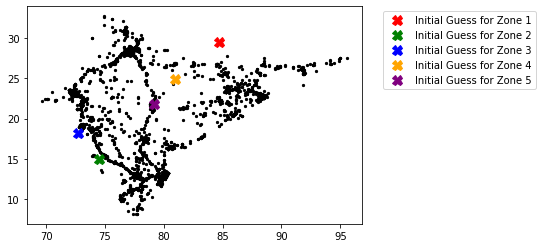

In [30]:
#Visualizing the initial centers
colors=['red','green','blue','orange','purple']
fig, ax = plt.subplots(figsize=(6,4))
for i,m in enumerate(mu0):
    ax.plot(m[1],m[0],'X',label="Initial Guess for Zone "+str(i+1),markersize=10,c=colors[i])
plt.scatter(Coordinates[ : , 1], Coordinates[ : , 0],c='k',s=5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [31]:
clusters=np.empty(Coordinates.shape,dtype=int)

#Loop over all points and determine which centroid is the closest
for i,p in enumerate(Coordinates): 
    d=np.array([np.linalg.norm(p-mu0[k]) for k in range(K)])
    bestKindex=np.argmin(d)
    clusters[i]=bestKindex
len(clusters[:,0])

4511

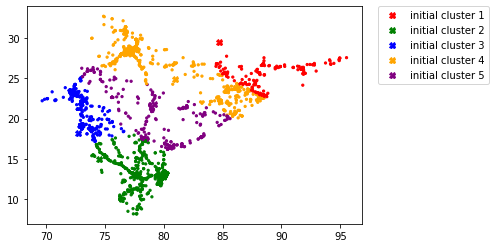

In [32]:
#Visualizing the closest points
clrs=[colors[i] for i in clusters[:,0]]
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(Coordinates[ : , 1], Coordinates[ : , 0],c=clrs,s=5)
for i,m in enumerate(mu0):
    ax.plot(m[1],m[0],'X',label="initial cluster "+str(i+1),c=colors[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Updated Guess


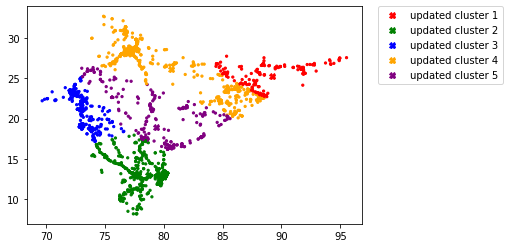

In [33]:
mu1= [np.array((np.mean(Coordinates[ : , 0][clusters[:,0]==k]),\
                np.mean(Coordinates[ : , 1][clusters[:,0]==k]))) for k in range(K)] 
print("Updated Guess")
np.round(mu1,2)

#Visualize the closest points
clrs=[colors[i] for i in clusters[:,0]]
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(Coordinates[ : , 1], Coordinates[ : , 0],c=clrs,s=5)
for i,m in enumerate(mu1):
    ax.plot(m[1],m[0],'X',label="updated cluster "+str(i+1),c=colors[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



In [34]:
diff=sum([np.linalg.norm(mu1[k]-mu0[k]) for k in range(K)])
n=2
nmax=100
#iterating and updating the cluster centroids and reassigning the values of the cluster accordingly
while diff>.0001 and n<nmax:
    print("------------------")
    print("Iteration:",n)
    n+=1
    
    mu0=mu1
    
    for i,p in enumerate(Coordinates):
        
        d=np.array([np.linalg.norm(p-mu0[k]) for k in range(K)])
        bestKindex=np.argmin(d)
        clusters[i]=bestKindex
    
    mu1= [np.array((np.mean(Coordinates[ : , 0][clusters[:,0]==k]),\
                    np.mean(Coordinates[ : , 1][clusters[:,0]==k]))) for k in range(K)] 
    
    print("Updated Guess:")
    print(np.round(mu1,2))
    diff=sum([np.linalg.norm(mu1[k]-mu0[k]) for k in range(K)])
    print("diff=",diff)
    

------------------
Iteration: 2
Updated Guess:
[[23.62 87.63]
 [12.83 78.75]
 [21.3  73.11]
 [28.12 77.51]
 [17.98 79.76]]
diff= 7.307120737069885
------------------
Iteration: 3
Updated Guess:
[[23.62 87.39]
 [12.81 78.75]
 [21.19 73.11]
 [28.25 77.1 ]
 [17.83 79.54]]
diff= 1.0615219595035377
------------------
Iteration: 4
Updated Guess:
[[23.61 87.37]
 [12.8  78.75]
 [21.17 73.1 ]
 [28.25 77.07]
 [17.79 79.48]]
diff= 0.15338715355537402
------------------
Iteration: 5
Updated Guess:
[[23.61 87.36]
 [12.8  78.76]
 [21.17 73.1 ]
 [28.25 77.07]
 [17.78 79.46]]
diff= 0.04399924818703468
------------------
Iteration: 6
Updated Guess:
[[23.61 87.36]
 [12.8  78.76]
 [21.18 73.1 ]
 [28.25 77.07]
 [17.76 79.45]]
diff= 0.0357644953640288
------------------
Iteration: 7
Updated Guess:
[[23.61 87.36]
 [12.8  78.76]
 [21.19 73.1 ]
 [28.25 77.07]
 [17.76 79.44]]
diff= 0.020208501430665986
------------------
Iteration: 8
Updated Guess:
[[23.61 87.36]
 [12.8  78.76]
 [21.19 73.1 ]
 [28.25 77.07]
 [

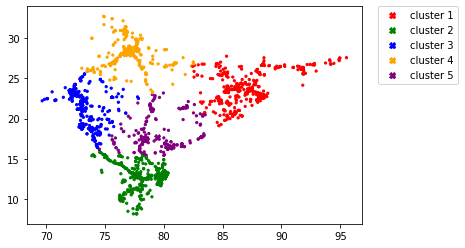

In [35]:
#Visualizing the updated cluster points after iterating to find the best fitting centroids
clrs=[colors[i] for i in clusters[:,0]]
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(Coordinates[ : , 1], Coordinates[ : , 0],c=clrs,s=5)
for i,m in enumerate(mu1):
    ax.plot(m[1],m[0],'X',label="cluster "+str(i+1),c=colors[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [36]:
#To display the latitudinal and longitudinal coordinates on the map we have imported the folium library that provides data from open street map
#%pip install folium

import folium

In [37]:
clrs=[colors[i] for i in clusters[:,0]]
center_lat = Coordinates[:,0].mean()
center_long = Coordinates[:,1].mean()
map1 = folium.Map(location=[center_lat, center_long], zoom_start=4.5,max_zoom=9,min_zoom=1)

for i,cord in enumerate(Coordinates):
    folium.CircleMarker(
      location=[cord[0],cord[1]],
      radius = float(1),
      #popup="("+str(cord[0])+","+str(cord[1])+")",
      tooltip = "("+str(cord[0])+","+str(cord[1])+")",
      color=clrs[i],
      fill_color="blue").add_to(map1)

map1

### 2. SVM

Given that we have determined a set of clusters from the previous section. We can now label the data accordingly and perform an SVM to determine which of the aforementioned zones with a new location fall under

In [38]:
#Code for appropriately labelling the data
Zones = []
Zones = ['East','South','West','North','Central']    
clrs=[colors[i] for i in clusters[:,0]]

zone = []   #defining the zones
for i in range(len(clrs)):
    if(clrs[i]=="green"):
        zone.append("South")
    if(clrs[i]=="blue"):
        zone.append("West")
    if(clrs[i]=="orange"):
        zone.append("North")
    if(clrs[i]=="red"):
        zone.append("East")
    if(clrs[i]=="purple"):
        zone.append("Central")

Clustered_Coordinates = []

for i in range(len(Coordinates)):
    val = []
    val.append(Coordinates[i][0])
    val.append(Coordinates[i][1])
    val.append(clusters[i][0])
    val.append(zone[i])
    Clustered_Coordinates.append(val)




Labelled_df = pd.DataFrame(Clustered_Coordinates,columns=["Latitude","Longitude","Zone_label","Zone"])

In [39]:
#displaying the top 25 rows of the labelled data
Labelled_df[:105]

Latitude  Longitude  Zone_label     Zone
0    13.155000  80.196000           1    South
1    12.839000  79.954000           1    South
2    11.871000  79.739000           1    South
3    11.872000  79.632000           1    South
4    13.215000  80.320000           1    South
..         ...        ...         ...      ...
100  17.580422  78.207737           4  Central
101  18.660618  80.031136           4  Central
102  20.606146  85.981534           0     East
103  13.167655  80.271159           1    South
104  19.125300  72.907667           2     West

[105 rows x 4 columns]

In [40]:
X = Coordinates
Y = Labelled_df["Zone_label"].tolist()

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,stratify=Y)

In [42]:
from sklearn.metrics import f1_score, accuracy_score #f1 score to use it as and evaluation metric
from sklearn import svm #support vector machine classifier

SVM_model_linear = svm.SVC(kernel='linear')
SVM_model_linear.fit(X_train,Y_train)
y_pred_linear = SVM_model_linear.predict(X_test)
accuracy_linear = accuracy_score(Y_test,y_pred_linear)

SVM_model_poly = svm.SVC(kernel='poly')
SVM_model_poly.fit(X_train,Y_train)
y_pred_poly = SVM_model_poly.predict(X_test)
accuracy_poly = accuracy_score(Y_test,y_pred_linear)


SVM_model_rbf = svm.SVC(kernel='rbf')
SVM_model_rbf.fit(X_train,Y_train)
y_pred_rbf = SVM_model_rbf.predict(X_test)
accuracy_rbf = accuracy_score(Y_test,y_pred_linear)

SVM_model_sigmoid = svm.SVC(kernel='sigmoid')
SVM_model_sigmoid.fit(X_train,Y_train)
y_pred_sigmoid = SVM_model_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(Y_test,y_pred_linear)

print("Accuracy of SVM model with each of the following Kernels")
print("Linear:\t\t",accuracy_linear)
print("Poly:\t\t",accuracy_poly)
print("rbf:\t\t",accuracy_rbf)
print("Sigmoid:\t",accuracy_sigmoid)

Accuracy of SVM model with each of the following Kernels
Linear:		 0.9961218836565097
Poly:		 0.9961218836565097
rbf:		 0.9961218836565097
Sigmoid:	 0.9961218836565097


In [43]:
#given a new input point Predict which Zone it would fall into
x_lat = float(input("Enter the Latitude\t"))
x_lon = float(input("Enter the Longitude\t"))

x = [np.array((x_lat,x_lon))]

y_pred = SVM_model_rbf.predict(x)

print("Coordinates:\t",x[0],"\t Zones:\t",Zones[y_pred[0]])


Enter the Latitude	30
Enter the Longitude	80
Coordinates:	 [30. 80.] 	 Zones:	 North


In [44]:
#This Function is used to return the Zones that the origin and destination belongs to given a set of origin and destination coordinates

def returnZone(X_origin,X_destination):
  y_origin = SVM_model_rbf.predict(X_origin)
  y_destination = SVM_model_rbf.predict(X_destination)
  return y_origin,y_destination        #returns two lists where the first list holds the information of the zones of the origin and the second list has information of the destination

## **Graph Algorithms**

From the given dataset a set of Origin and Destination Locations was extracted and distance between them was calculated based on the Euclidean Distance of their coordinates.



### 3. Bellman Ford 

Once we have the graph of network of different locations BellMan Ford Algorithm was implemented

In [45]:
#making a new dataframe consisting of the relevant columns for implementing the Bellman Ford's Algorithm
Graph_df = df[["Origin_Location","Org_lat_lon","Destination_Location","Des_lat_lon"]]
Graph_df.dropna(inplace=True)

<ipython-input-45-2b2300930c50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Graph_df.dropna(inplace=True)


In [46]:
#splitting the comma separated values of the coordinate values
Graph_df[["Org_Lat","Org_Lon"]]=Graph_df['Org_lat_lon'].str.split(',', expand=True)
Graph_df[["Des_Lat","Des_Lon"]]=Graph_df['Des_lat_lon'].str.split(',', expand=True)

/Users/adityaroychoudhary/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [47]:
#extracting the values into lists
Origin = Graph_df["Origin_Location"].tolist()
Origin_Latitude = Graph_df["Org_Lat"].tolist()
Origin_Longitude = Graph_df["Org_Lon"].tolist()
Destination = Graph_df["Destination_Location"].tolist()
Destination_Latitude = Graph_df["Des_Lat"].tolist()
Destination_Longitude = Graph_df["Des_Lon"].tolist()


In [48]:
#Getting the zones of the origins and destination from the SVM prediction model.
Origin_Zones = []
Destination_Zones = []

Origin_Coordinate = []
for i in range(len(Origin_Latitude)):
  Origin_Coordinate.append([float(Origin_Latitude[i]),float(Origin_Longitude[i])])
Destination_Coordinate = []
for i in range(len(Destination_Latitude)):
  Destination_Coordinate.append([float(Destination_Latitude[i]),float(Destination_Longitude[i])])

Origin_Zones, Destination_Zones = returnZone(Origin_Coordinate,Destination_Coordinate)


#### Nationwide Network of truck routes

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
import math
Graph_list = []
for i in range(len(Origin)):
    val = []
    if (Origin_Latitude[i] != Destination_Latitude[i]) and (Origin_Longitude[i] != Destination_Longitude[i]) and (Origin[i] != Destination[i]):
        distance = 0.0
        val.append(Origin[i].lower())
        val.append(float(Origin_Latitude[i]))
        val.append(float(Origin_Longitude[i]))
        val.append(Destination[i].lower())
        val.append(float(Destination_Latitude[i]))
        val.append(float(Destination_Longitude[i]))
        distance = math.sqrt(math.pow(float(Origin_Longitude[i])-float(Destination_Longitude[i]),2)+math.pow(float(Origin_Latitude[i])-float(Destination_Latitude[i]),2))
        val.append(distance)
        Graph_list.append(val)
    

In [50]:
G = nx.Graph()
for i in range(len(Graph_list)):
  G.add_edge(Graph_list[i][0],Graph_list[i][3],weight=Graph_list[i][6])


AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

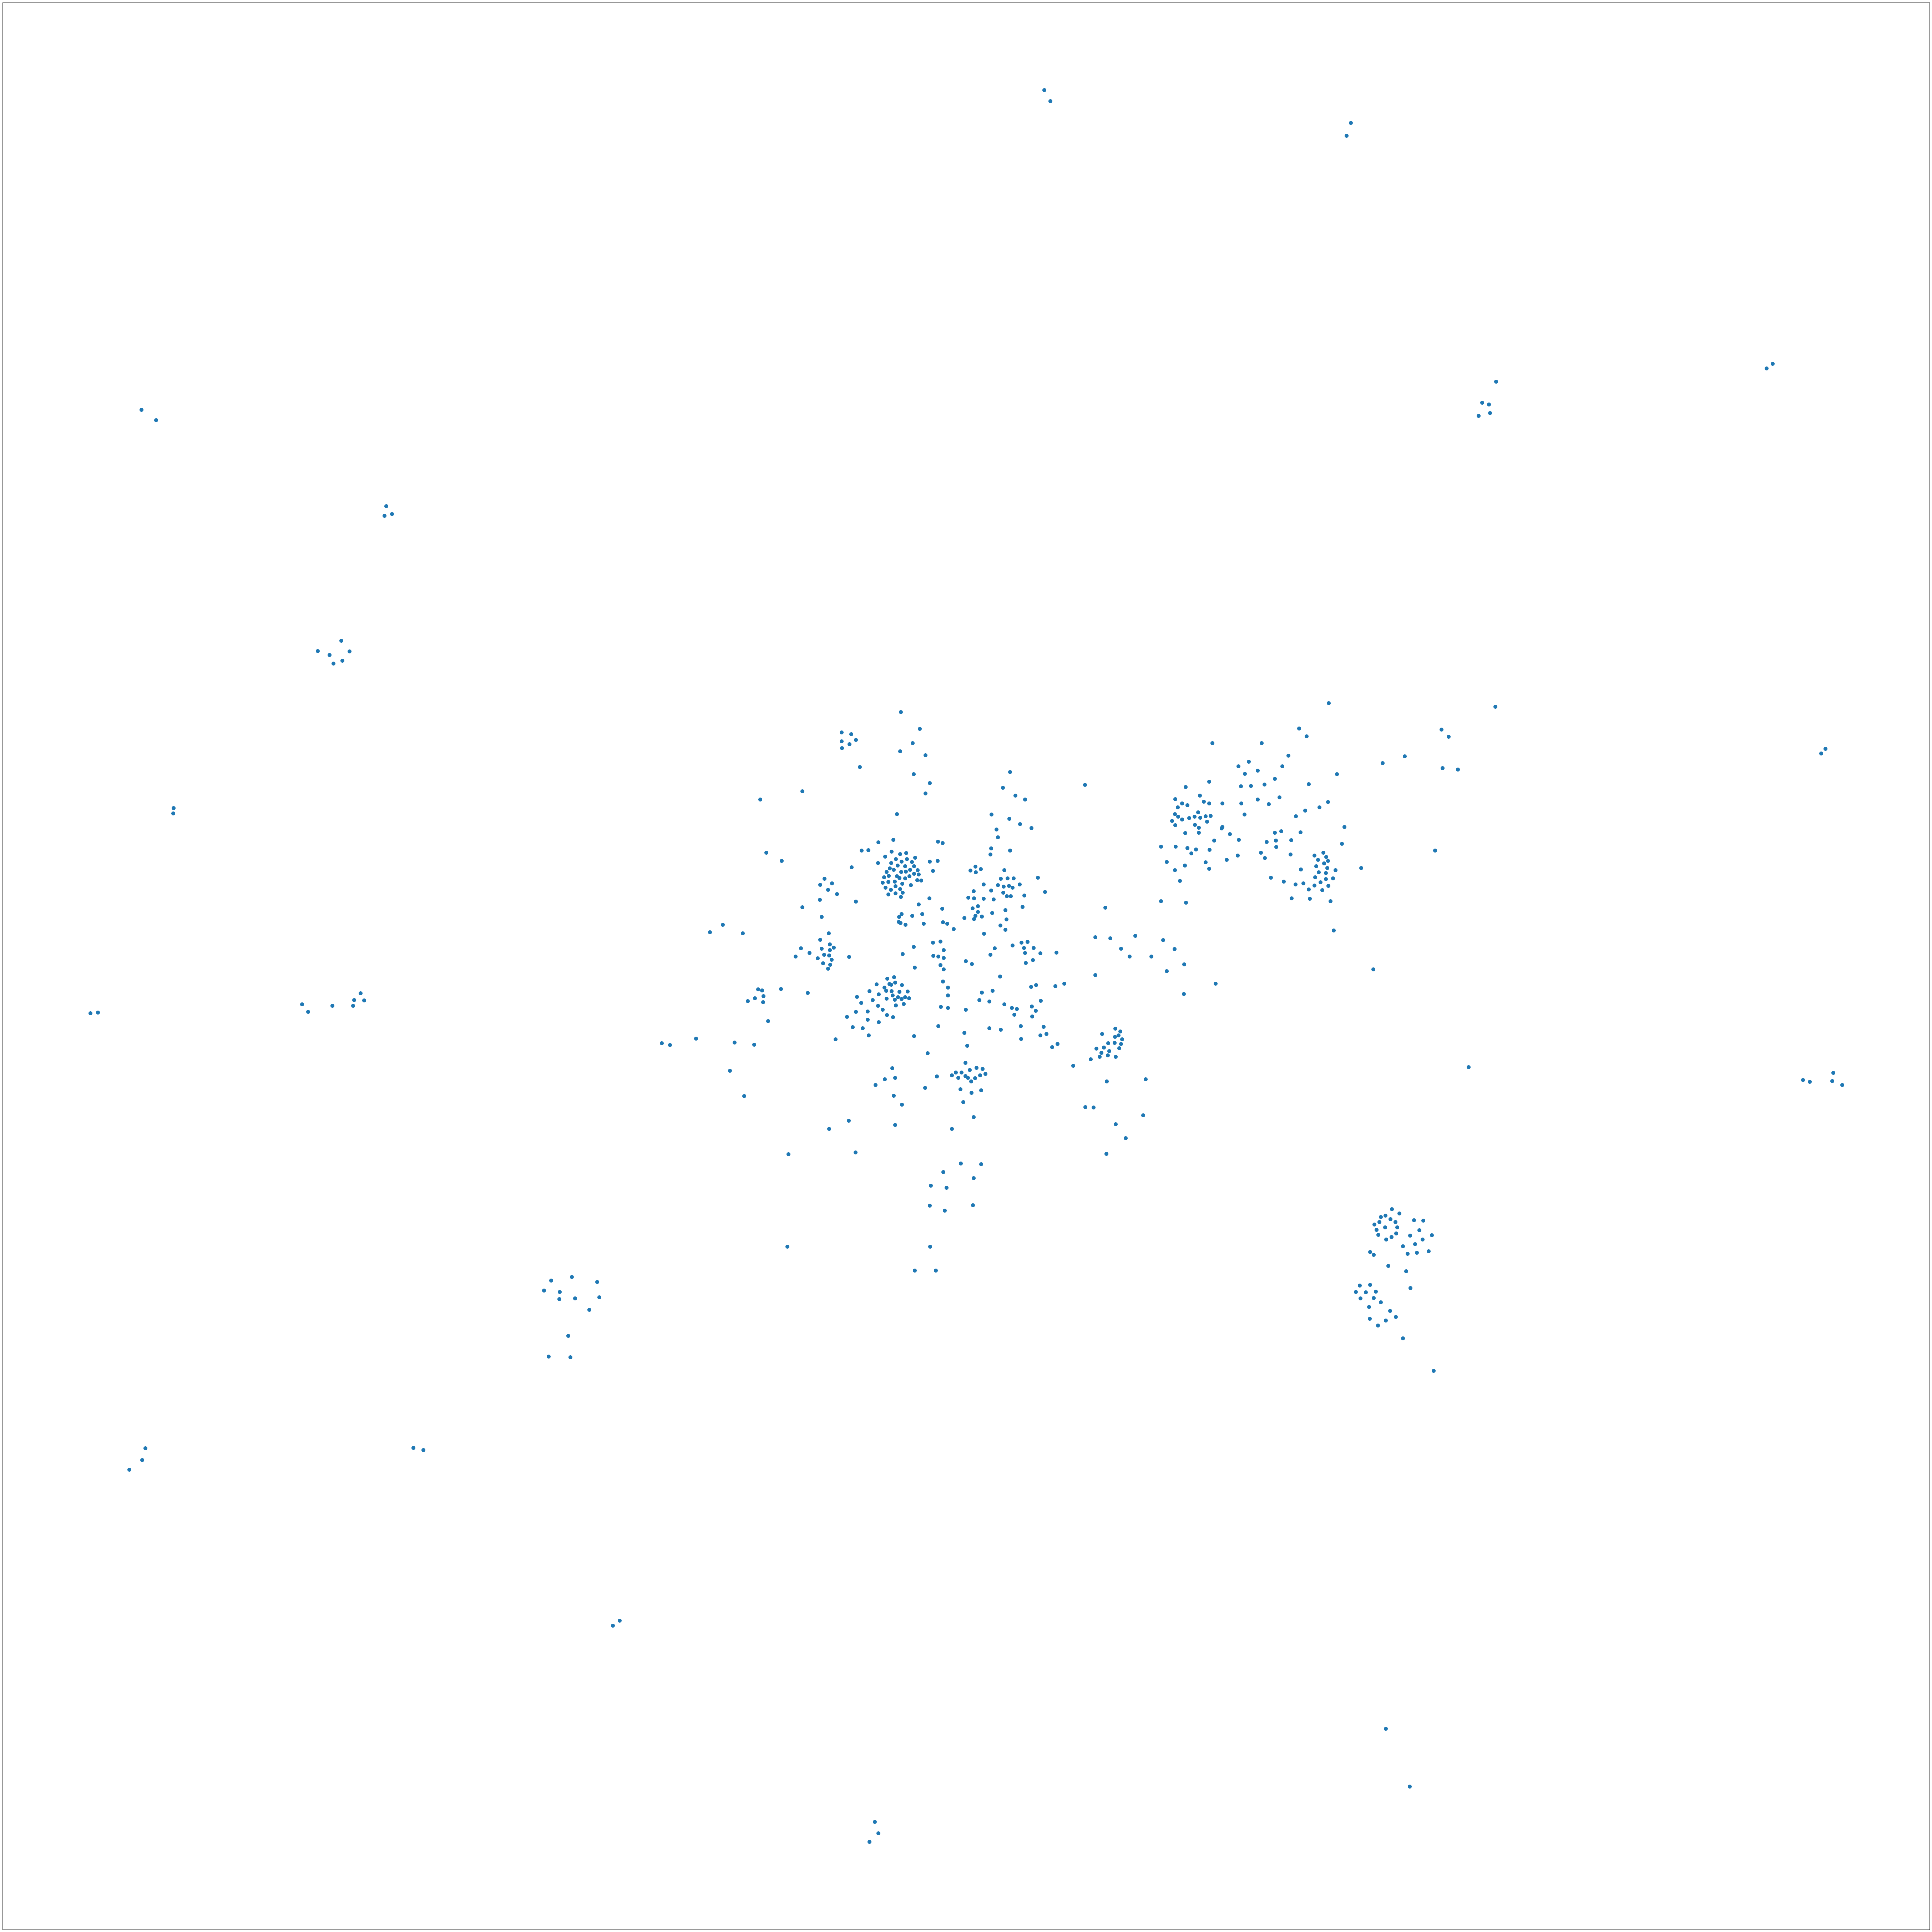

In [51]:
#COMPLETE NETWORK OF THE TRUCKING SERVICE
pos = nx.spring_layout(G)
labels = {
    n: (n
        if (len(list(nx.all_neighbors(G, n))) >= 10) and (n in pos)
        else '')
    for n in pos
}
plt.figure(3,figsize=(75,75)) 
nx.draw(G, with_labels=True,labels=labels,node_size=100,font_size=25)
plt.show()

In [52]:
import sys

def initializeDistances(G):
  Distance = {}
  for i in G.nodes:
    Distance[i]=sys.maxsize
  return Distance


def BellmanFord(G,source,destination):
  Parent = {}
  Parent[source]=None
  Distance = initializeDistances(G)
  Distance[source]=0
  Distance[destination]=sys.maxsize
  for _ in range(len(G.nodes)):
    for u,v,w in G.edges(data=True):
      if Distance[u] + w['weight'] < Distance[v]:
        #print("u:",u)
        #print("v:",v)
        Parent[v]=u
        Distance[v]=Distance[u]+w['weight']

  path = []
  if Distance[destination] != sys.maxsize:
    u = Parent[destination]
    path.append(destination)
    while(u!=None):
      path.append(u)
      u=Parent[u]
      
  return path[::-1],Parent

  

In [53]:
source = "singaperumalkoil, kanchipuram, tamil nadu"
destination = "athipattu, tiruvallur, tamil nadu"

#source = "ASHOK LEYLAND ENNORE,CHENNAI,TAMIL NADU"
#destination = "TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU"

DestPath,Parents = BellmanFord(G,source,destination)

print("Path taken from Source to Destination in the given graph")
print(DestPath[0],end="")
for i in range(1,len(DestPath)):
  print("--->",DestPath[i],end="")

#print()
#print(Parents)

Path taken from Source to Destination in the given graph
singaperumalkoil, kanchipuram, tamil nadu---> gopanapalli, krishnagiri, tamil nadu---> mookandapalli, krishnagiri, tamil nadu---> athipattu, tiruvallur, tamil nadu

#### Graphs where the source and destinations of the truck routes are within the same zone (Intra-Zonal) 

##### Zone 0 - 'East' 

In [54]:
#Initializing List for East Zone
Origin_East = []
Origin_Latitude_East = []
Origin_Longitude_East = []
Destination_East = []
Destination_Latitude_East = []
Destination_Longitude_East = []
Origin_Zones_East = []
Destination_Zones_East = []

In [55]:
#Gathering relevant data points from the superset data
for i in range(len(Origin)):
  if(Origin_Zones[i]==0 and Destination_Zones[i]==0):
    Origin_East.append(Origin[i])
    Origin_Latitude_East.append(Origin_Latitude[i])
    Origin_Longitude_East.append(Origin_Longitude[i])
    Destination_East.append(Destination[i])
    Destination_Latitude_East.append(Destination_Latitude[i])
    Destination_Longitude_East.append(Destination_Longitude[i])
    Origin_Zones_East.append(Origin_Zones[i])
    Destination_Zones_East.append(Destination_Zones[i])

print(Origin_East[0:10],"\n\n",Origin_Zones_East[0:10])

['Bokaro Steel City, Bokaro, Jharkhand', 'Bokaro Steel City, Bokaro, Jharkhand', 'Narangi, Kamrup, Assam', 'Kuldanga, Howrah, West Bengal', 'Kuldanga, Howrah, West Bengal', 'Bokaro Steel City, Bokaro, Jharkhand', 'Durgapur RS, Bardhaman, West Bengal', 'Durgapur RS, Bardhaman, West Bengal', 'Durgapur RS, Bardhaman, West Bengal', 'Durgapur RS, Bardhaman, West Bengal'] 

 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [56]:
Graph_list_East = []
for i in range(len(Origin_East)):
    val = []
    if (Origin_Latitude_East[i] != Destination_Latitude_East[i]) and (Origin_Longitude_East[i] != Destination_Longitude_East[i]) and (Origin_East[i] != Destination_East[i]):
        distance = 0.0
        val.append(Origin_East[i].lower())
        val.append(float(Origin_Latitude_East[i]))
        val.append(float(Origin_Longitude_East[i]))
        val.append(Destination_East[i].lower())
        val.append(float(Destination_Latitude_East[i]))
        val.append(float(Destination_Longitude_East[i]))
        distance = math.sqrt(math.pow(float(Origin_Longitude_East[i])-float(Destination_Longitude_East[i]),2)+math.pow(float(Origin_Latitude_East[i])-float(Destination_Latitude_East[i]),2))
        val.append(distance)
        Graph_list_East.append(val)

In [57]:
G_East = nx.Graph()
for i in range(len(Graph_list_East)):
  G_East.add_edge(Graph_list_East[i][0],Graph_list_East[i][3],weight=Graph_list_East[i][6])

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

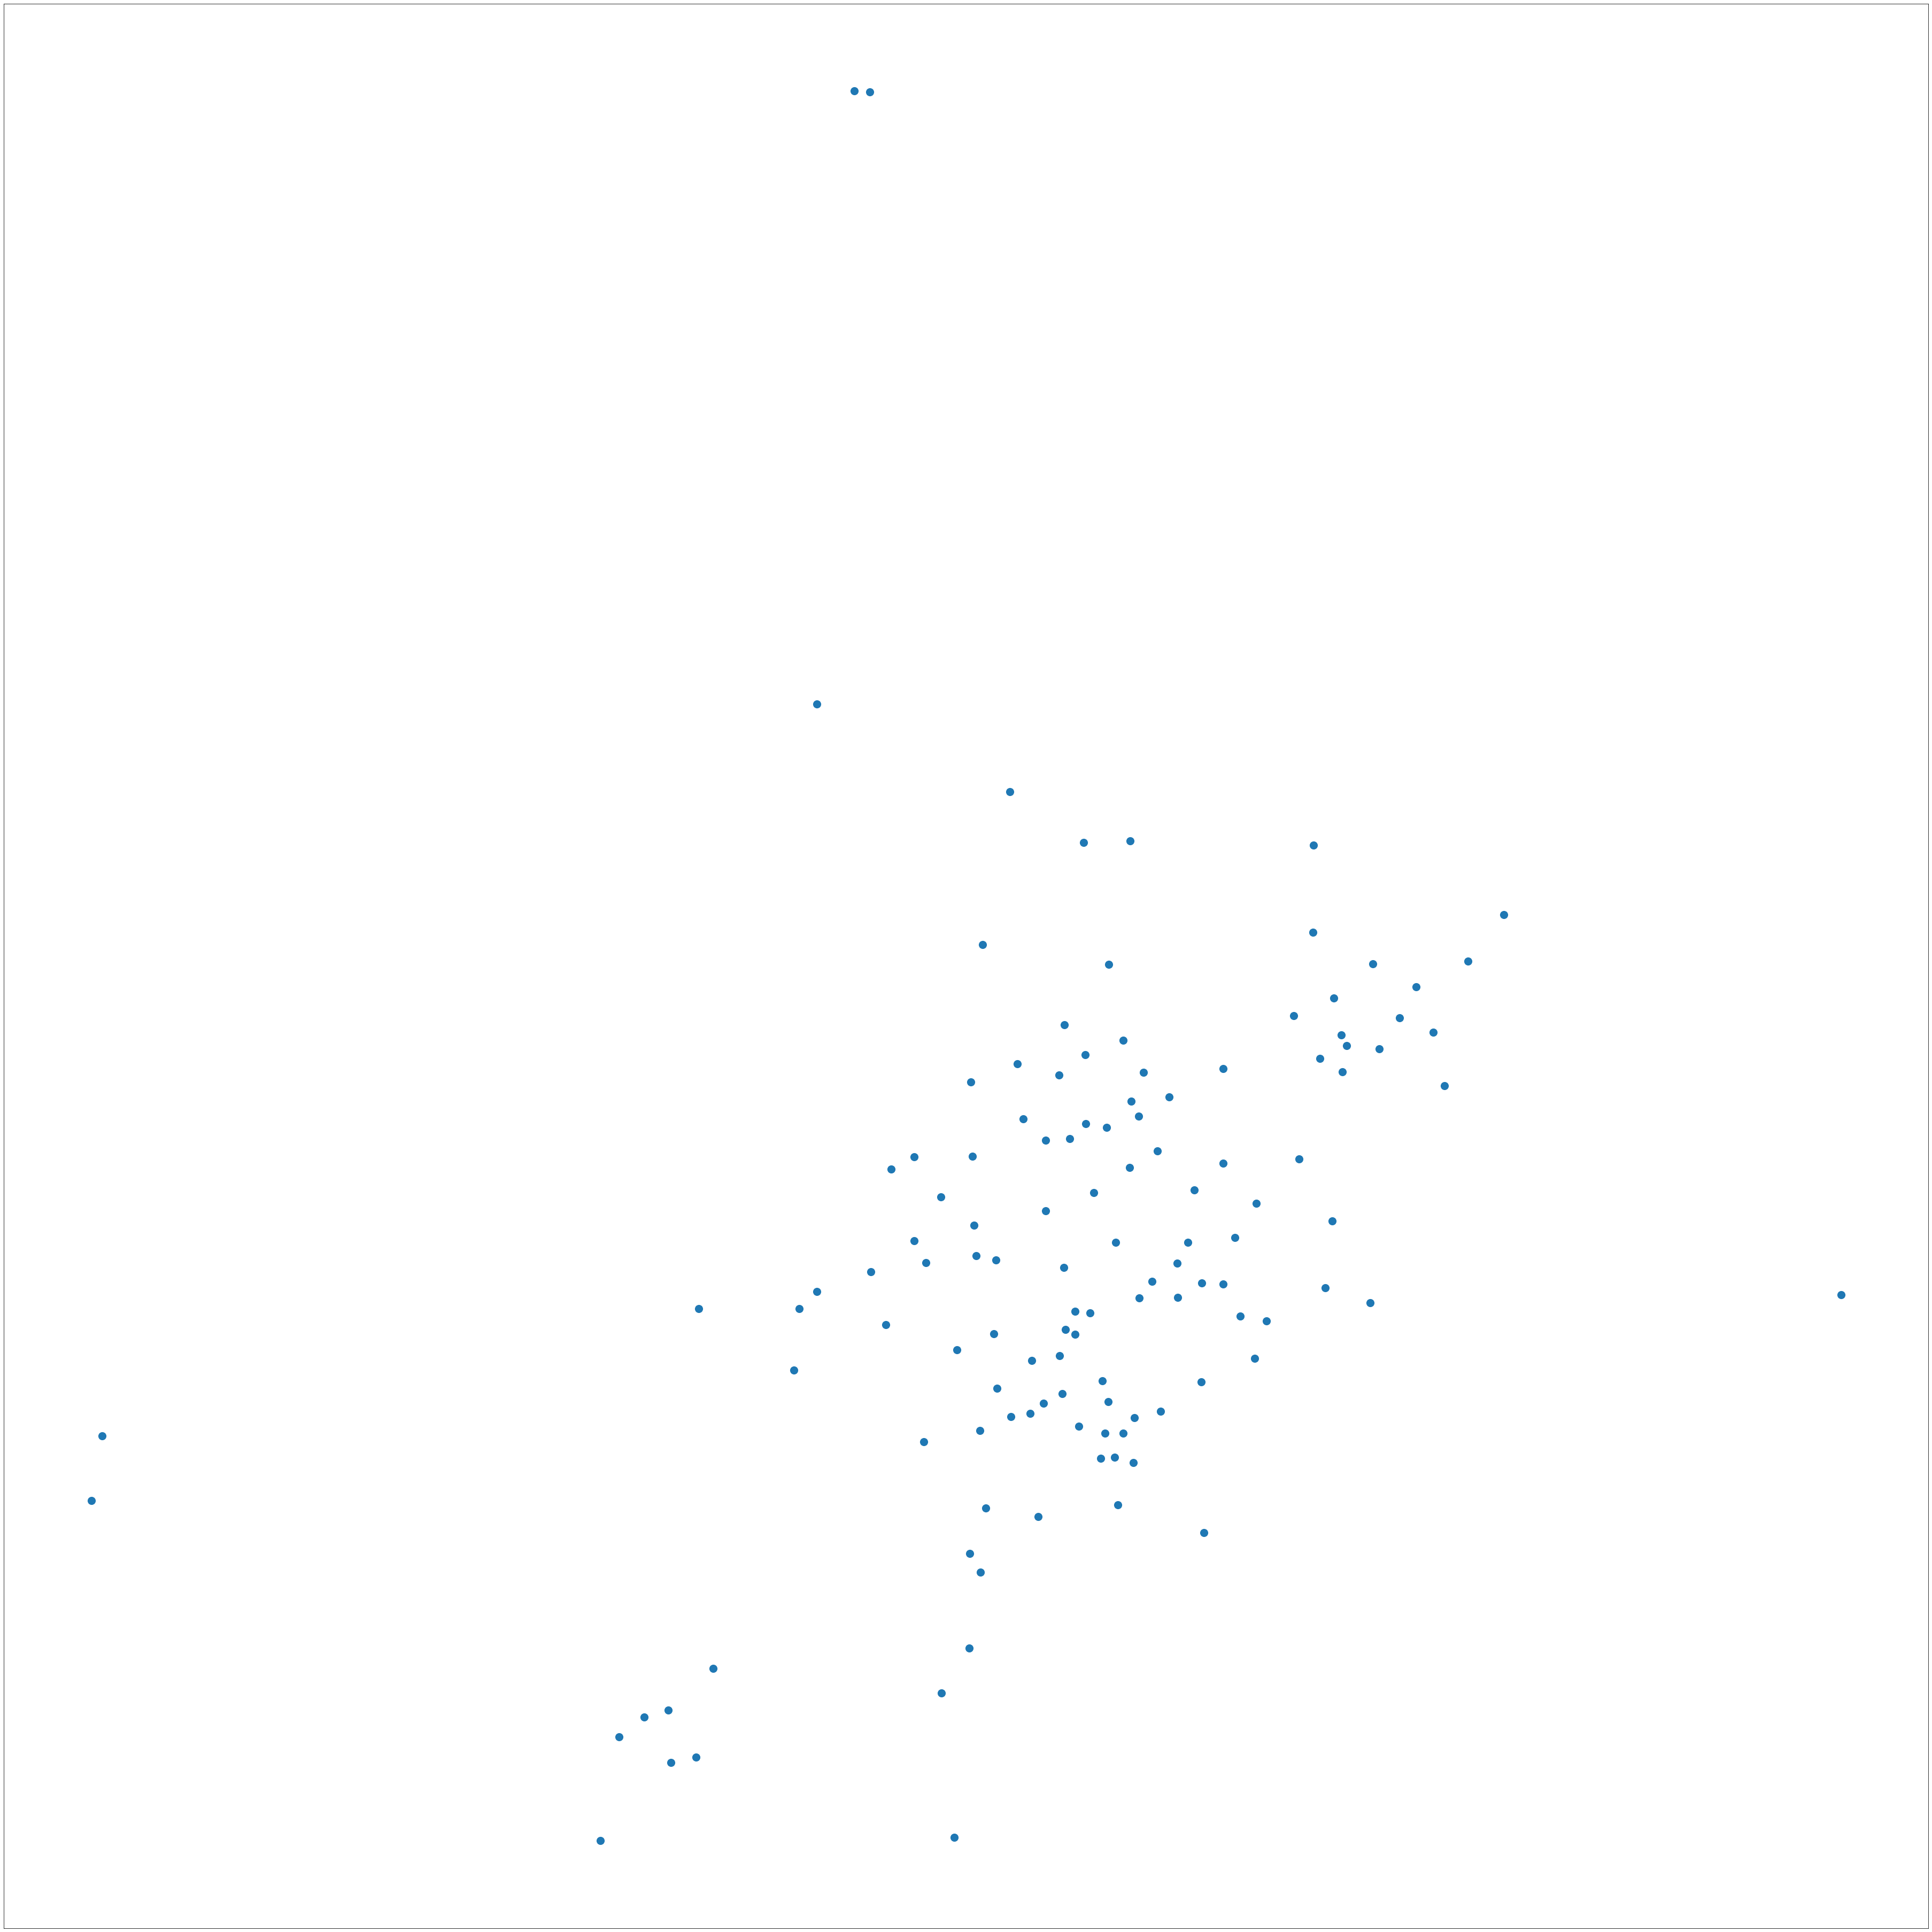

In [58]:
#NETWORK OF TRUCK ROUTES FOR THE EAST ZONE - ZONE : 0
plt.figure(3,figsize=(50,50)) 
nx.draw(G_East, with_labels=True,node_size=200,font_size=25)
plt.show()

In [59]:
#Implementing Bellman Ford for East Zone
source = "bokaro steel city, bokaro, jharkhand"
destination = "boreya, ranchi, jharkhand"


if(source in G_East.nodes) and (destination in G_East.nodes):
  DestPath,Parents = BellmanFord(G_East,source,destination)

  print("Path taken from Source to Destination in the given graph")
  print(DestPath[0],end="")
  for i in range(1,len(DestPath)):
    print("--->",DestPath[i],end="")

else:
  print("Source or Destination not a part of the graph")


Path taken from Source to Destination in the given graph
bokaro steel city, bokaro, jharkhand---> b.s.city plant, bokaro, jharkhand---> boreya, ranchi, jharkhand

##### Zone 1 - 'South'

In [60]:
#Initialising list for South Zone
Origin_South = []
Origin_Latitude_South = []
Origin_Longitude_South= []
Destination_South= []
Destination_Latitude_South= []
Destination_Longitude_South= []
Origin_Zones_South= []
Destination_Zones_South= []

In [61]:
#Gathering relevant data points from the superset data
for i in range(len(Origin)):
  if(Origin_Zones[i]==1 and Destination_Zones[i]==1):
    Origin_South.append(Origin[i])
    Origin_Latitude_South.append(Origin_Latitude[i])
    Origin_Longitude_South.append(Origin_Longitude[i])
    Destination_South.append(Destination[i])
    Destination_Latitude_South.append(Destination_Latitude[i])
    Destination_Longitude_South.append(Destination_Longitude[i])
    Origin_Zones_South.append(Origin_Zones[i])
    Destination_Zones_South.append(Destination_Zones[i])

print(Origin_South[0:10],"\n\n",Origin_Zones_South[0:10])

['TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU', 'DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,TAMIL NADU', 'LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY', 'DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,TAMIL NADU', 'LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY', 'DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,TAMIL NADU', 'DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,TAMIL NADU', 'DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,TAMIL NADU', 'ASHOK LEYLAND ENNORE,CHENNAI,TAMIL NADU', 'DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,TAMIL NADU'] 

 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [62]:
Graph_list_South = []
for i in range(len(Origin_South)):
    val = []
    if (Origin_Latitude_South[i] != Destination_Latitude_South[i]) and (Origin_Longitude_South[i] != Destination_Longitude_South[i]) and (Origin_South[i] != Destination_South[i]):
        distance = 0.0
        val.append(Origin_South[i].lower())
        val.append(float(Origin_Latitude_South[i]))
        val.append(float(Origin_Longitude_South[i]))
        val.append(Destination_South[i].lower())
        val.append(float(Destination_Latitude_South[i]))
        val.append(float(Destination_Longitude_South[i]))
        distance = math.sqrt(math.pow(float(Origin_Longitude_South[i])-float(Destination_Longitude_South[i]),2)+math.pow(float(Origin_Latitude_South[i])-float(Destination_Latitude_South[i]),2))
        val.append(distance)
        Graph_list_South.append(val)

In [63]:
G_South = nx.Graph()
for i in range(len(Graph_list_South)):
  G_South.add_edge(Graph_list_South[i][0],Graph_list_South[i][3],weight=Graph_list_South[i][6])

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

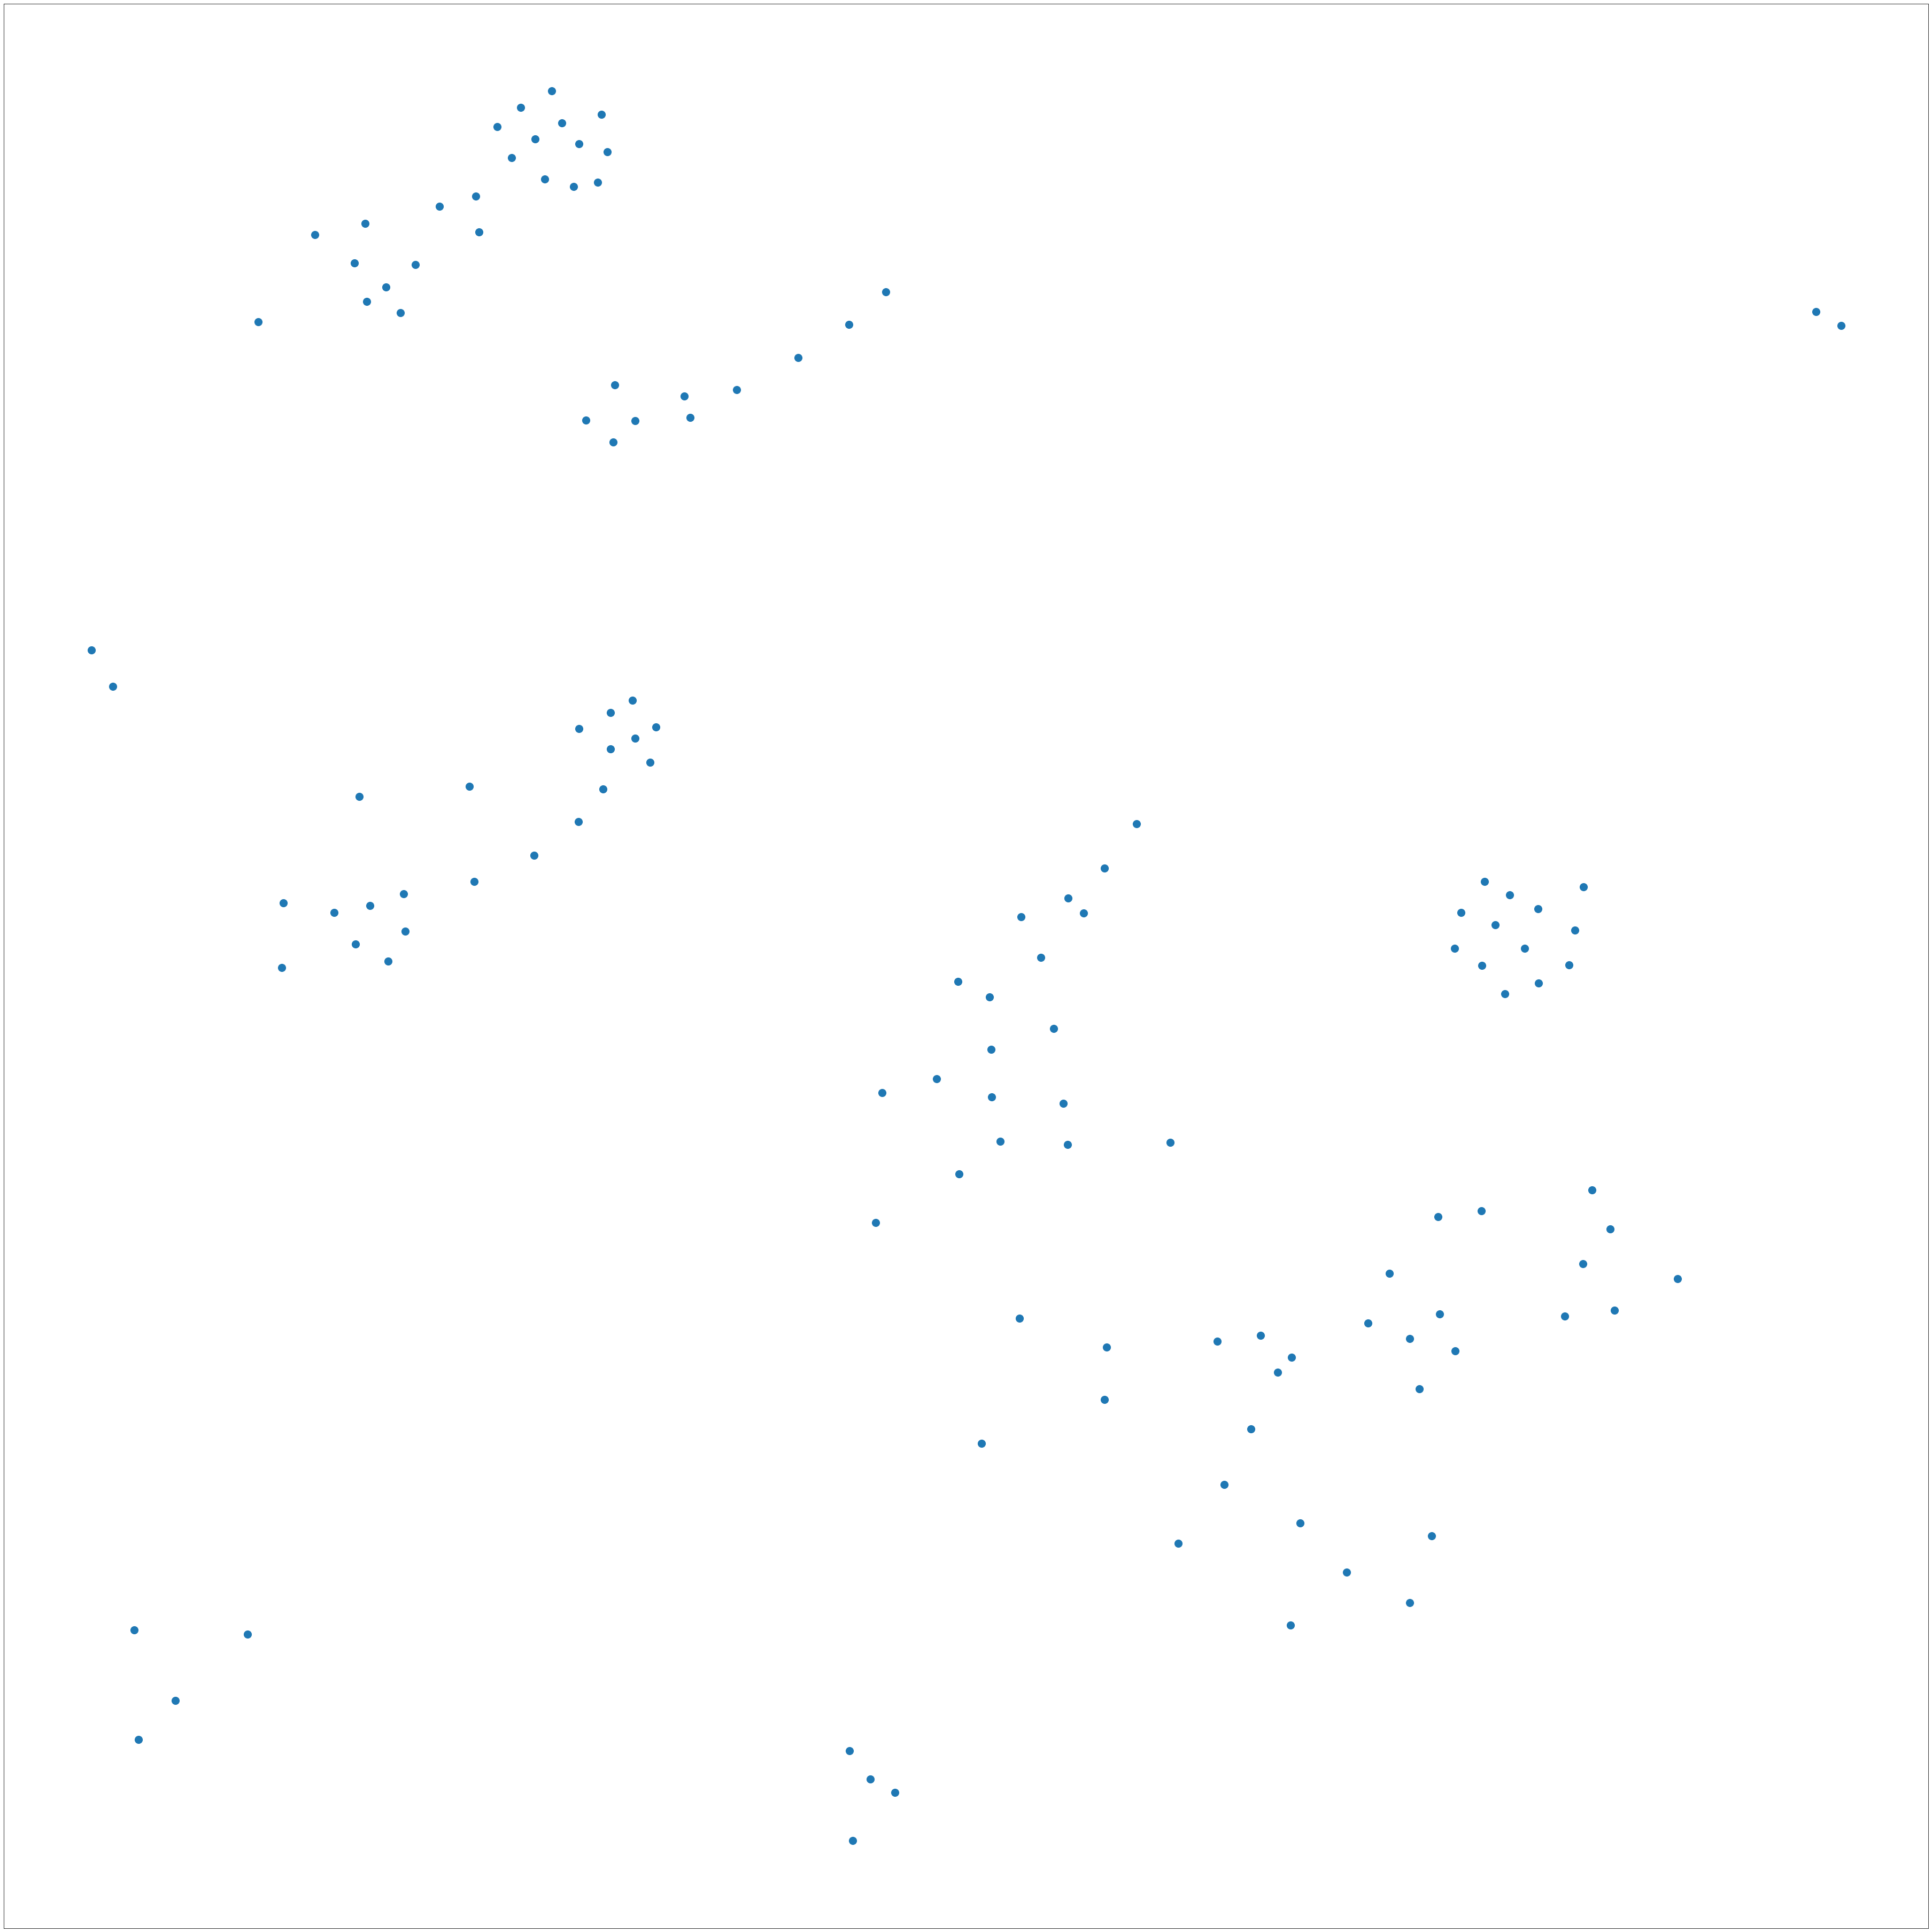

In [64]:
#NETWORK OF TRUCK ROUTES FOR THE SOUTH ZONE - ZONE : 0
plt.figure(3,figsize=(50,50)) 
nx.draw(G_South, with_labels=True,node_size=200,font_size=25)
plt.show()

In [ ]:
#Implementing Bellman Ford for South Zone
source = "tvslsl-puzhal-hub,chennai,tamil nadu"
destination = "ashok leyland plant 2-hosur,hosur,karnataka"



if(source in G_South.nodes) and (destination in G_South.nodes):
  DestPath,Parents = BellmanFord(G_South,source,destination)

  print("Path taken from Source to Destination in the given graph")
  print(DestPath[0],end="")
  for i in range(1,len(DestPath)):
    print("--->",DestPath[i],end="")

else:
  print("Source or Destination not a part of the graph")

##### Zone 2 - 'West'

In [65]:
#Initialising list for West Zone
Origin_West = []
Origin_Latitude_West = []
Origin_Longitude_West = []
Destination_West = []
Destination_Latitude_West = []
Destination_Longitude_West = []
Origin_Zones_West = []
Destination_Zones_West = []

In [66]:
#Gathering relevant data points from the superset data
for i in range(len(Origin)):
  if(Origin_Zones[i]==2 and Destination_Zones[i]==2):
    Origin_West.append(Origin[i])
    Origin_Latitude_West.append(Origin_Latitude[i])
    Origin_Longitude_West.append(Origin_Longitude[i])
    Destination_West.append(Destination[i])
    Destination_Latitude_West.append(Destination_Latitude[i])
    Destination_Longitude_West.append(Destination_Longitude[i])
    Origin_Zones_West.append(Origin_Zones[i])
    Destination_Zones_West.append(Destination_Zones[i])

print(Origin_West[0:10],"\n\n",Origin_Zones_West[0:10])

['TVSLSL HUB (CHAKAN),PUNE,MAHARASHTRA', 'TVSLSL HUB (CHAKAN),PUNE,MAHARASHTRA', 'TVSLSL HUB (CHAKAN),PUNE,MAHARASHTRA', 'MOTHERSON SUMI SYSTEM LTD,AHMEDABAD,GUJARAT', 'MOTHERSON SUMI SYSTEM LTD,AHMEDABAD,GUJARAT', 'MOTHERSON SUMI SYSTEM LTD,AHMEDABAD,GUJARAT', 'MOTHERSON SUMI SYSTEM LTD,AHMEDABAD,GUJARAT', 'MOTHERSON SUMI SYSTEM LTD,AHMEDABAD,GUJARAT', 'MOTHERSON SUMI SYSTEM LTD,AHMEDABAD,GUJARAT', 'MOTHERSON SUMI SYSTEM LTD,AHMEDABAD,GUJARAT'] 

 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [67]:
Graph_list_West = []
for i in range(len(Origin_West)):
    val = []
    if (Origin_Latitude_West[i] != Destination_Latitude_West[i]) and (Origin_Longitude_West[i] != Destination_Longitude_West[i]) and (Origin_West[i] != Destination_West[i]):
        distance = 0.0
        val.append(Origin_West[i].lower())
        val.append(float(Origin_Latitude_West[i]))
        val.append(float(Origin_Longitude_West[i]))
        val.append(Destination_West[i].lower())
        val.append(float(Destination_Latitude_West[i]))
        val.append(float(Destination_Longitude_West[i]))
        distance = math.sqrt(math.pow(float(Origin_Longitude_West[i])-float(Destination_Longitude_West[i]),2)+math.pow(float(Origin_Latitude_West[i])-float(Destination_Latitude_West[i]),2))
        val.append(distance)
        Graph_list_West.append(val)

In [68]:
G_West = nx.Graph()
for i in range(len(Graph_list_West)):
  G_West.add_edge(Graph_list_West[i][0],Graph_list_West[i][3],weight=Graph_list_West[i][6])

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

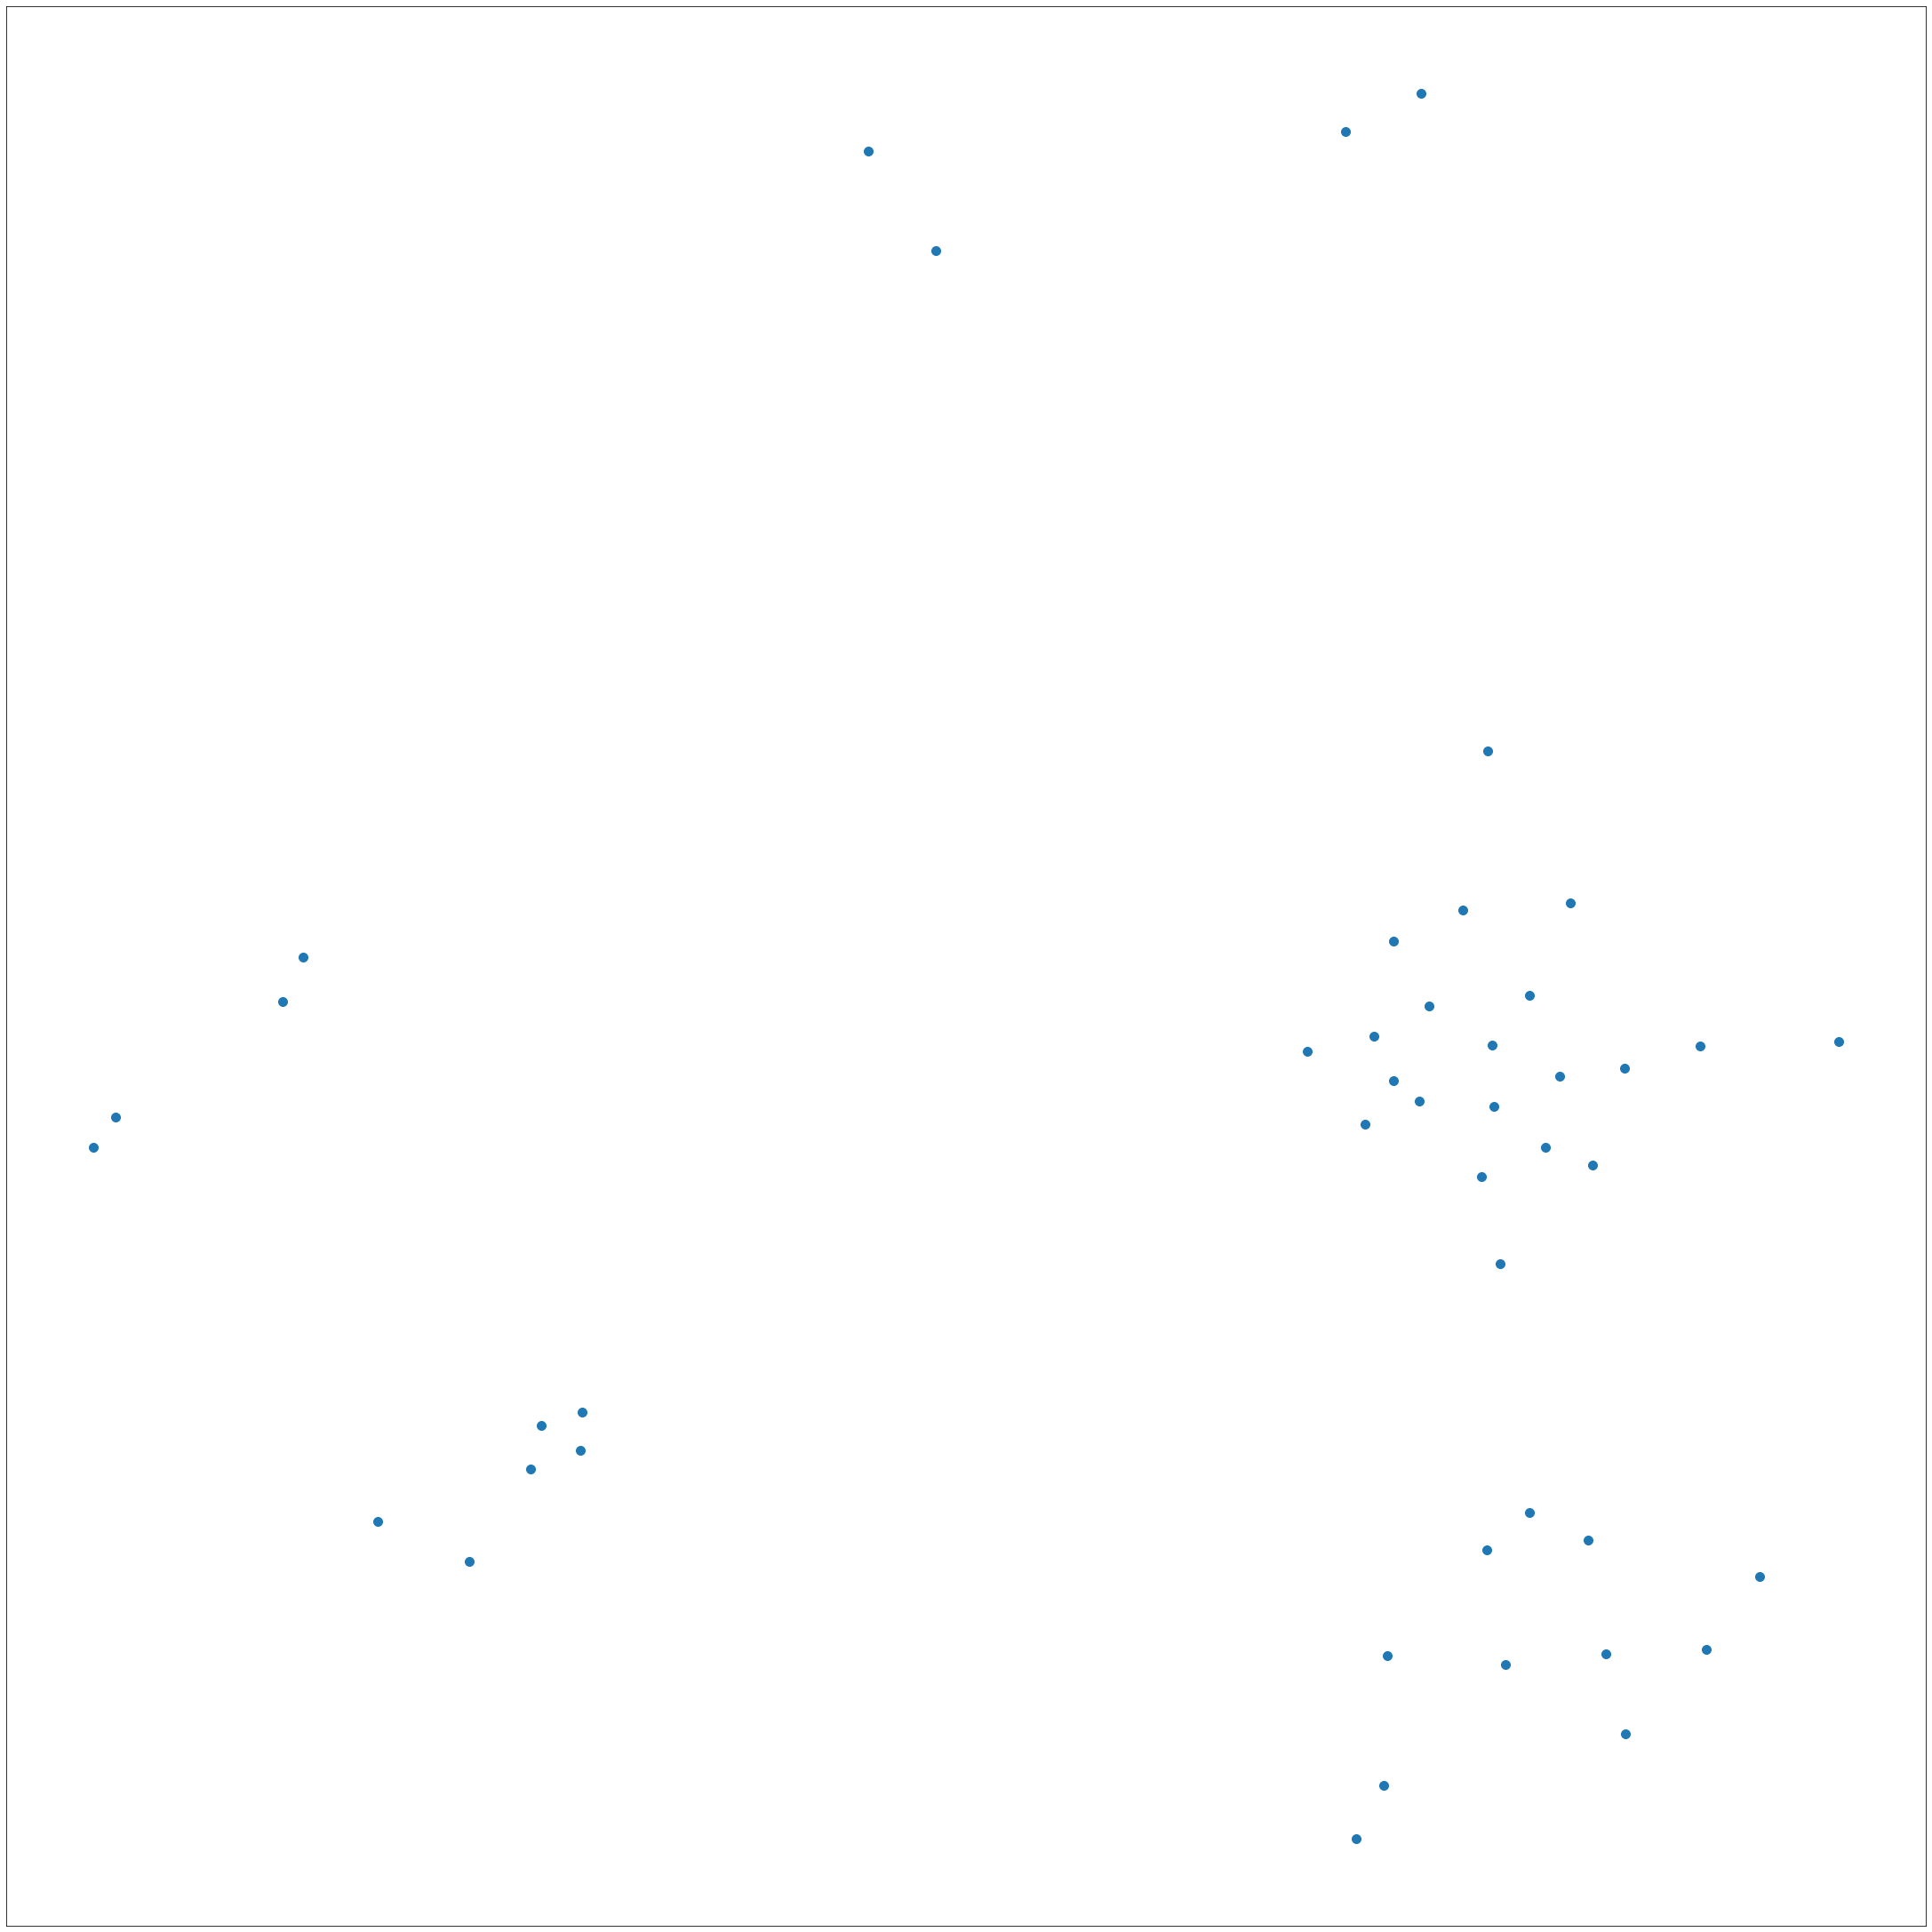

In [69]:
#NETWORK OF TRUCK ROUTES FOR THE WEST ZONE - ZONE : 0
plt.figure(3,figsize=(30,30)) 
nx.draw(G_West, with_labels=True,node_size=100,font_size=18)
plt.show()

In [70]:
#Implementing Bellman Ford for West Zone
source = "tvslsl-puzhal-hub,chennai,tamil nadu"
destination = "ashok leyland plant 2-hosur,hosur,karnataka"



if(source in G_West.nodes) and (destination in G_West.nodes):
  DestPath,Parents = BellmanFord(G_West,source,destination)

  print("Path taken from Source to Destination in the given graph")
  print(DestPath[0],end="")
  for i in range(1,len(DestPath)):
    print("--->",DestPath[i],end="")

else:
  print("Source or Destination not a part of the graph")

Source or Destination not a part of the graph


##### Zone 3 - 'North'

In [71]:
#Initialising list for North Zone
Origin_North = []
Origin_Latitude_North = []
Origin_Longitude_North = []
Destination_North = []
Destination_Latitude_North = []
Destination_Longitude_North = []
Origin_Zones_North = []
Destination_Zones_North = []

In [72]:
#Gathering relevant data points from the superset data
for i in range(len(Origin)):
  if(Origin_Zones[i]==3 and Destination_Zones[i]==3):
    Origin_North.append(Origin[i])
    Origin_Latitude_North.append(Origin_Latitude[i])
    Origin_Longitude_North.append(Origin_Longitude[i])
    Destination_North.append(Destination[i])
    Destination_Latitude_North.append(Destination_Latitude[i])
    Destination_Longitude_North.append(Destination_Longitude[i])
    Origin_Zones_North.append(Origin_Zones[i])
    Destination_Zones_North.append(Destination_Zones[i])

print(Origin_North[0:10],"\n\n",Origin_Zones_North[0:10])

['NATIONAL ENGG.IND.LTD.,JAIPUR,RAJASTHAN', 'Ramte Ram Road, Ghaziabad, Uttar Pradesh', 'Ramte Ram Road, Ghaziabad, Uttar Pradesh', 'HEROMOTOCORP LTD,ALWAR,RAJASTHAN', 'HEROMOTOCORP LTD,ALWAR,RAJASTHAN', 'HEROMOTOCORP LTD,ALWAR,RAJASTHAN', 'HEROMOTOCORP LTD,ALWAR,RAJASTHAN', 'TVSLSL-JAMALPURL-HUB,GURGAON,HARYANA', 'HEROMOTOCORP LTD,ALWAR,RAJASTHAN', 'Ramte Ram Road, Ghaziabad, Uttar Pradesh'] 

 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [73]:
Graph_list_North = []
for i in range(len(Origin_North)):
    val = []
    if (Origin_Latitude_North[i] != Destination_Latitude_North[i]) and (Origin_Longitude_North[i] != Destination_Longitude_North[i]) and (Origin_North[i] != Destination_North[i]):
        distance = 0.0
        val.append(Origin_North[i].lower())
        val.append(float(Origin_Latitude_North[i]))
        val.append(float(Origin_Longitude_North[i]))
        val.append(Destination_North[i].lower())
        val.append(float(Destination_Latitude_North[i]))
        val.append(float(Destination_Longitude_North[i]))
        distance = math.sqrt(math.pow(float(Origin_Longitude_North[i])-float(Destination_Longitude_North[i]),2)+math.pow(float(Origin_Latitude_North[i])-float(Destination_Latitude_North[i]),2))
        val.append(distance)
        Graph_list_North.append(val)

In [74]:
G_North = nx.Graph()
for i in range(len(Graph_list_North)):
  G_North.add_edge(Graph_list_North[i][0],Graph_list_North[i][3],weight=Graph_list_North[i][6])

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

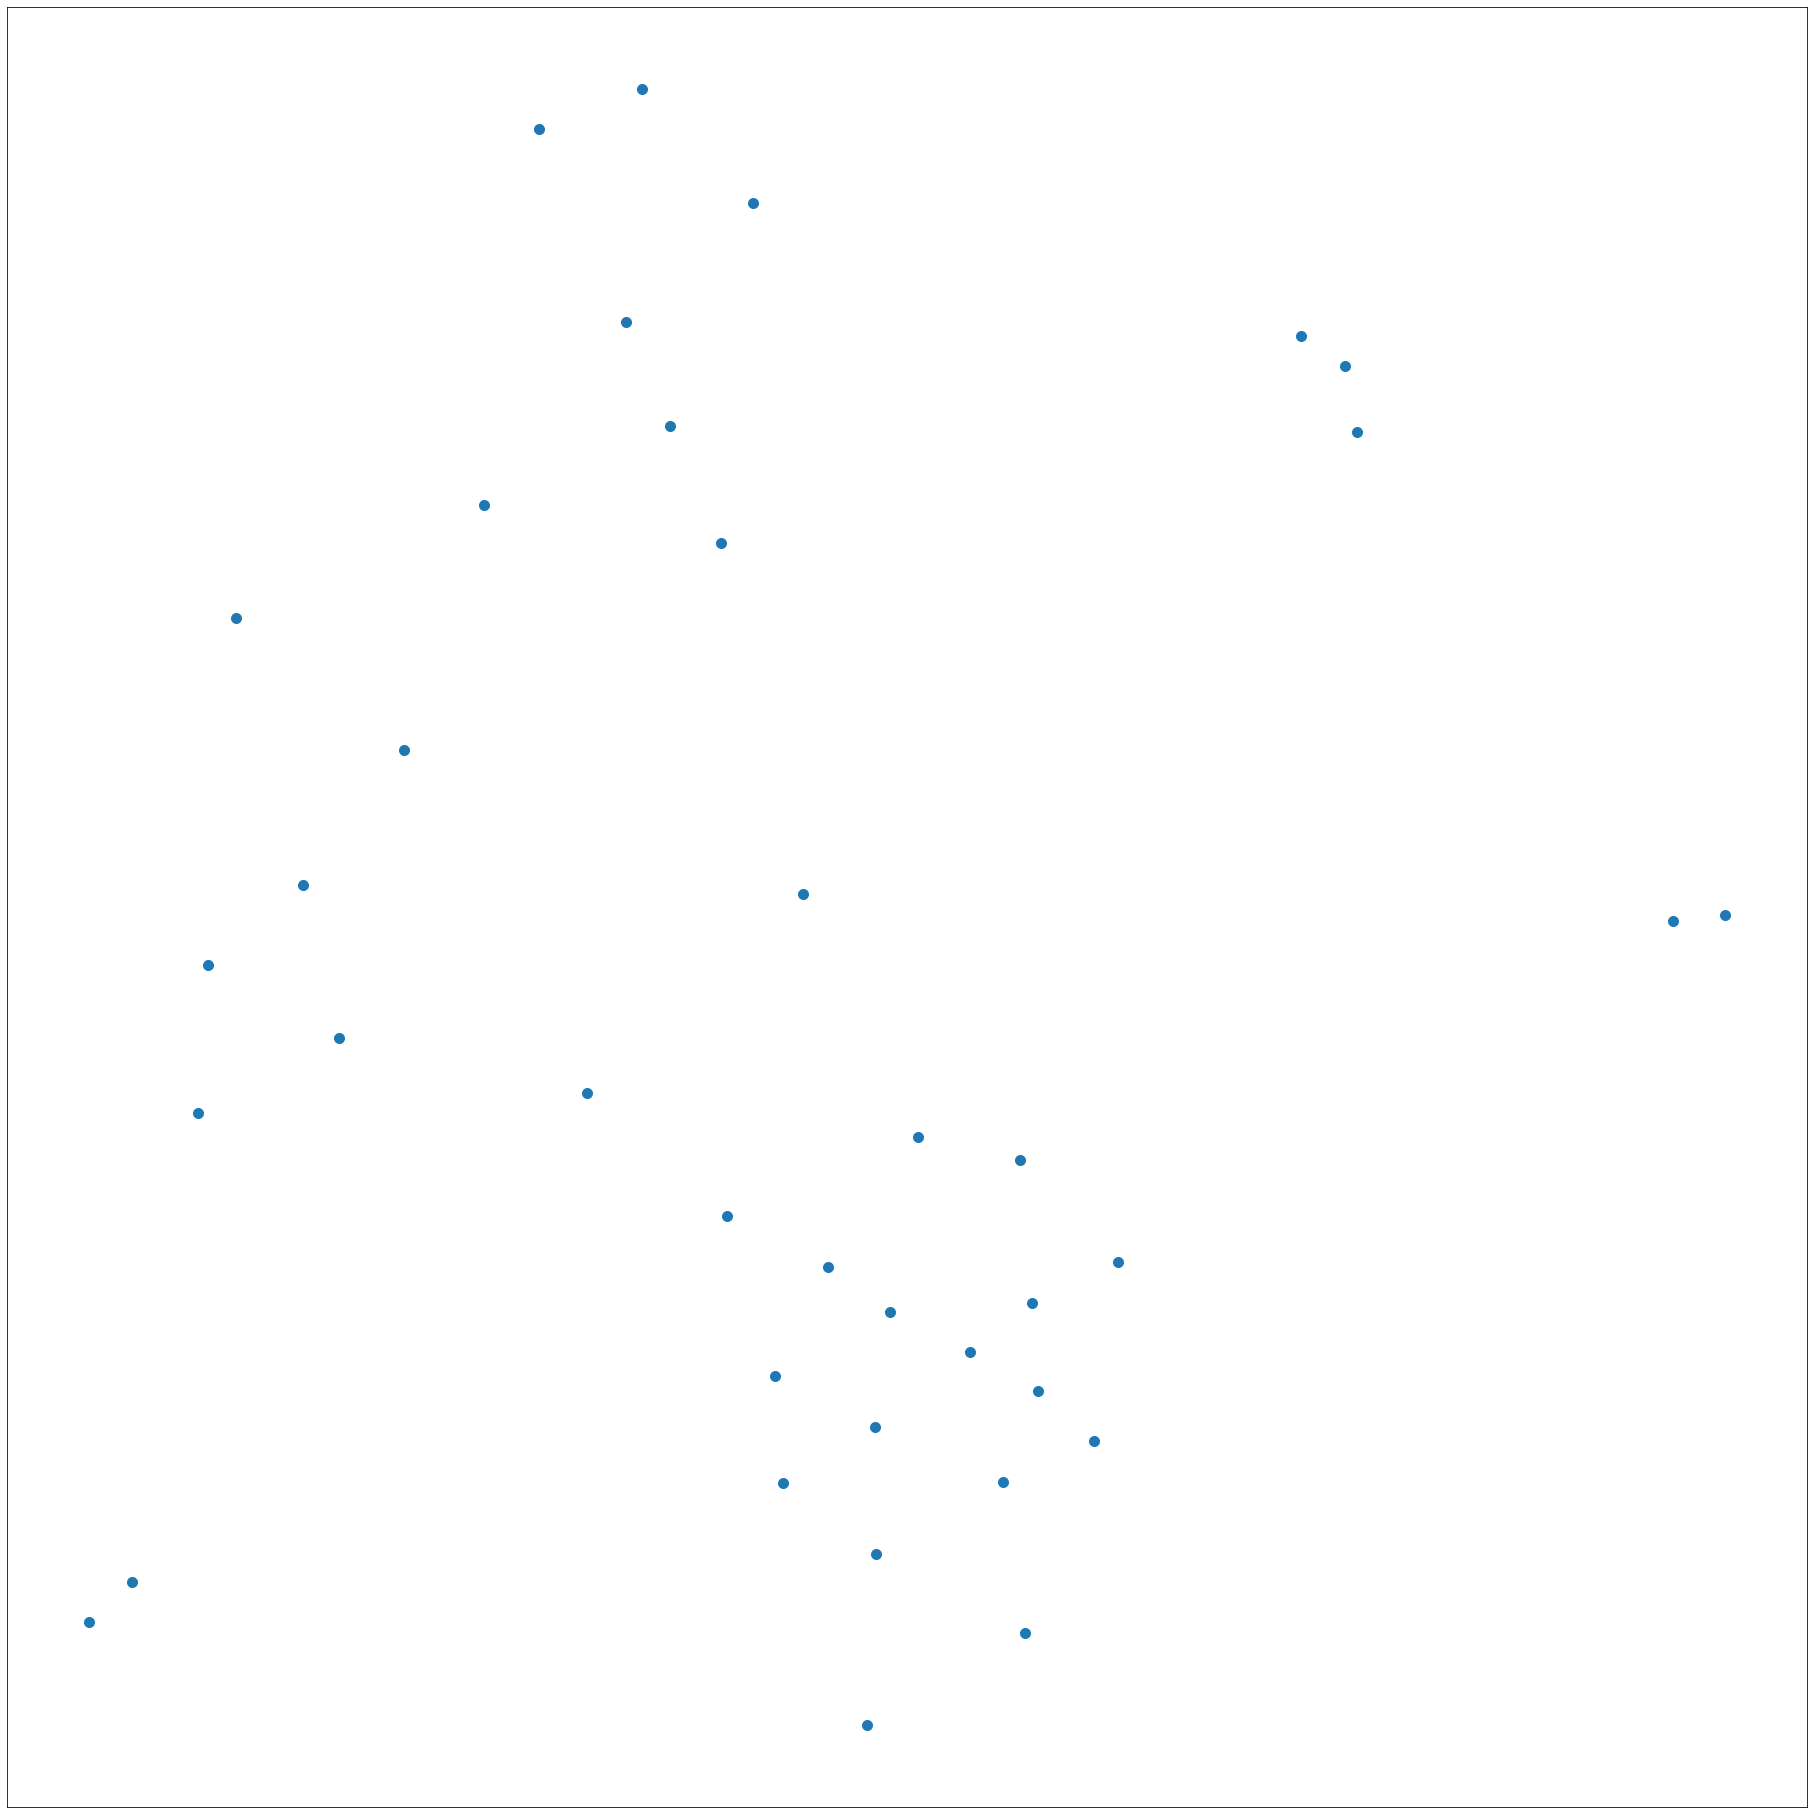

In [75]:
#NETWORK OF TRUCK ROUTES FOR THE NORTH ZONE - ZONE : 0
plt.figure(3,figsize=(25,25)) 
nx.draw(G_North, with_labels=True,node_size=100,font_size=18)
plt.show()

In [76]:
#Implementing Bellman Ford for North Zone
source = "tvslsl-puzhal-hub,chennai,tamil nadu"
destination = "ashok leyland plant 2-hosur,hosur,karnataka"



if(source in G_North.nodes) and (destination in G_North.nodes):
  DestPath,Parents = BellmanFord(G_North,source,destination)

  print("Path taken from Source to Destination in the given graph")
  print(DestPath[0],end="")
  for i in range(1,len(DestPath)):
    print("--->",DestPath[i],end="")

else:
  print("Source or Destination not a part of the graph")

Source or Destination not a part of the graph


##### Zone 4 - 'Central'

In [77]:
#Initialising list for Central Zone
Origin_Central = []
Origin_Latitude_Central = []
Origin_Longitude_Central = []
Destination_Central = []
Destination_Latitude_Central = []
Destination_Longitude_Central = []
Origin_Zones_Central = []
Destination_Zones_Central = []

In [78]:
#Gathering relevant data points from the superset data
for i in range(len(Origin)):
  if(Origin_Zones[i]==3 and Destination_Zones[i]==3):
    Origin_Central.append(Origin[i])
    Origin_Latitude_Central.append(Origin_Latitude[i])
    Origin_Longitude_Central.append(Origin_Longitude[i])
    Destination_Central.append(Destination[i])
    Destination_Latitude_Central.append(Destination_Latitude[i])
    Destination_Longitude_Central.append(Destination_Longitude[i])
    Origin_Zones_Central.append(Origin_Zones[i])
    Destination_Zones_Central.append(Destination_Zones[i])

print(Origin_Central[0:10],"\n\n",Origin_Zones_Central[0:10])

['NATIONAL ENGG.IND.LTD.,JAIPUR,RAJASTHAN', 'Ramte Ram Road, Ghaziabad, Uttar Pradesh', 'Ramte Ram Road, Ghaziabad, Uttar Pradesh', 'HEROMOTOCORP LTD,ALWAR,RAJASTHAN', 'HEROMOTOCORP LTD,ALWAR,RAJASTHAN', 'HEROMOTOCORP LTD,ALWAR,RAJASTHAN', 'HEROMOTOCORP LTD,ALWAR,RAJASTHAN', 'TVSLSL-JAMALPURL-HUB,GURGAON,HARYANA', 'HEROMOTOCORP LTD,ALWAR,RAJASTHAN', 'Ramte Ram Road, Ghaziabad, Uttar Pradesh'] 

 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [79]:
Graph_list_Central = []
for i in range(len(Origin_Central)):
    val = []
    if (Origin_Latitude_Central[i] != Destination_Latitude_Central[i]) and (Origin_Longitude_Central[i] != Destination_Longitude_Central[i]) and (Origin_Central[i] != Destination_Central[i]):
        distance = 0.0
        val.append(Origin_Central[i].lower())
        val.append(float(Origin_Latitude_Central[i]))
        val.append(float(Origin_Longitude_Central[i]))
        val.append(Destination_Central[i].lower())
        val.append(float(Destination_Latitude_Central[i]))
        val.append(float(Destination_Longitude_Central[i]))
        distance = math.sqrt(math.pow(float(Origin_Longitude_Central[i])-float(Destination_Longitude_Central[i]),2)+math.pow(float(Origin_Latitude_Central[i])-float(Destination_Latitude_Central[i]),2))
        val.append(distance)
        Graph_list_Central.append(val)

In [80]:
G_Central = nx.Graph()
for i in range(len(Graph_list_Central)):
  G_Central.add_edge(Graph_list_Central[i][0],Graph_list_Central[i][3],weight=Graph_list_Central[i][6])

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

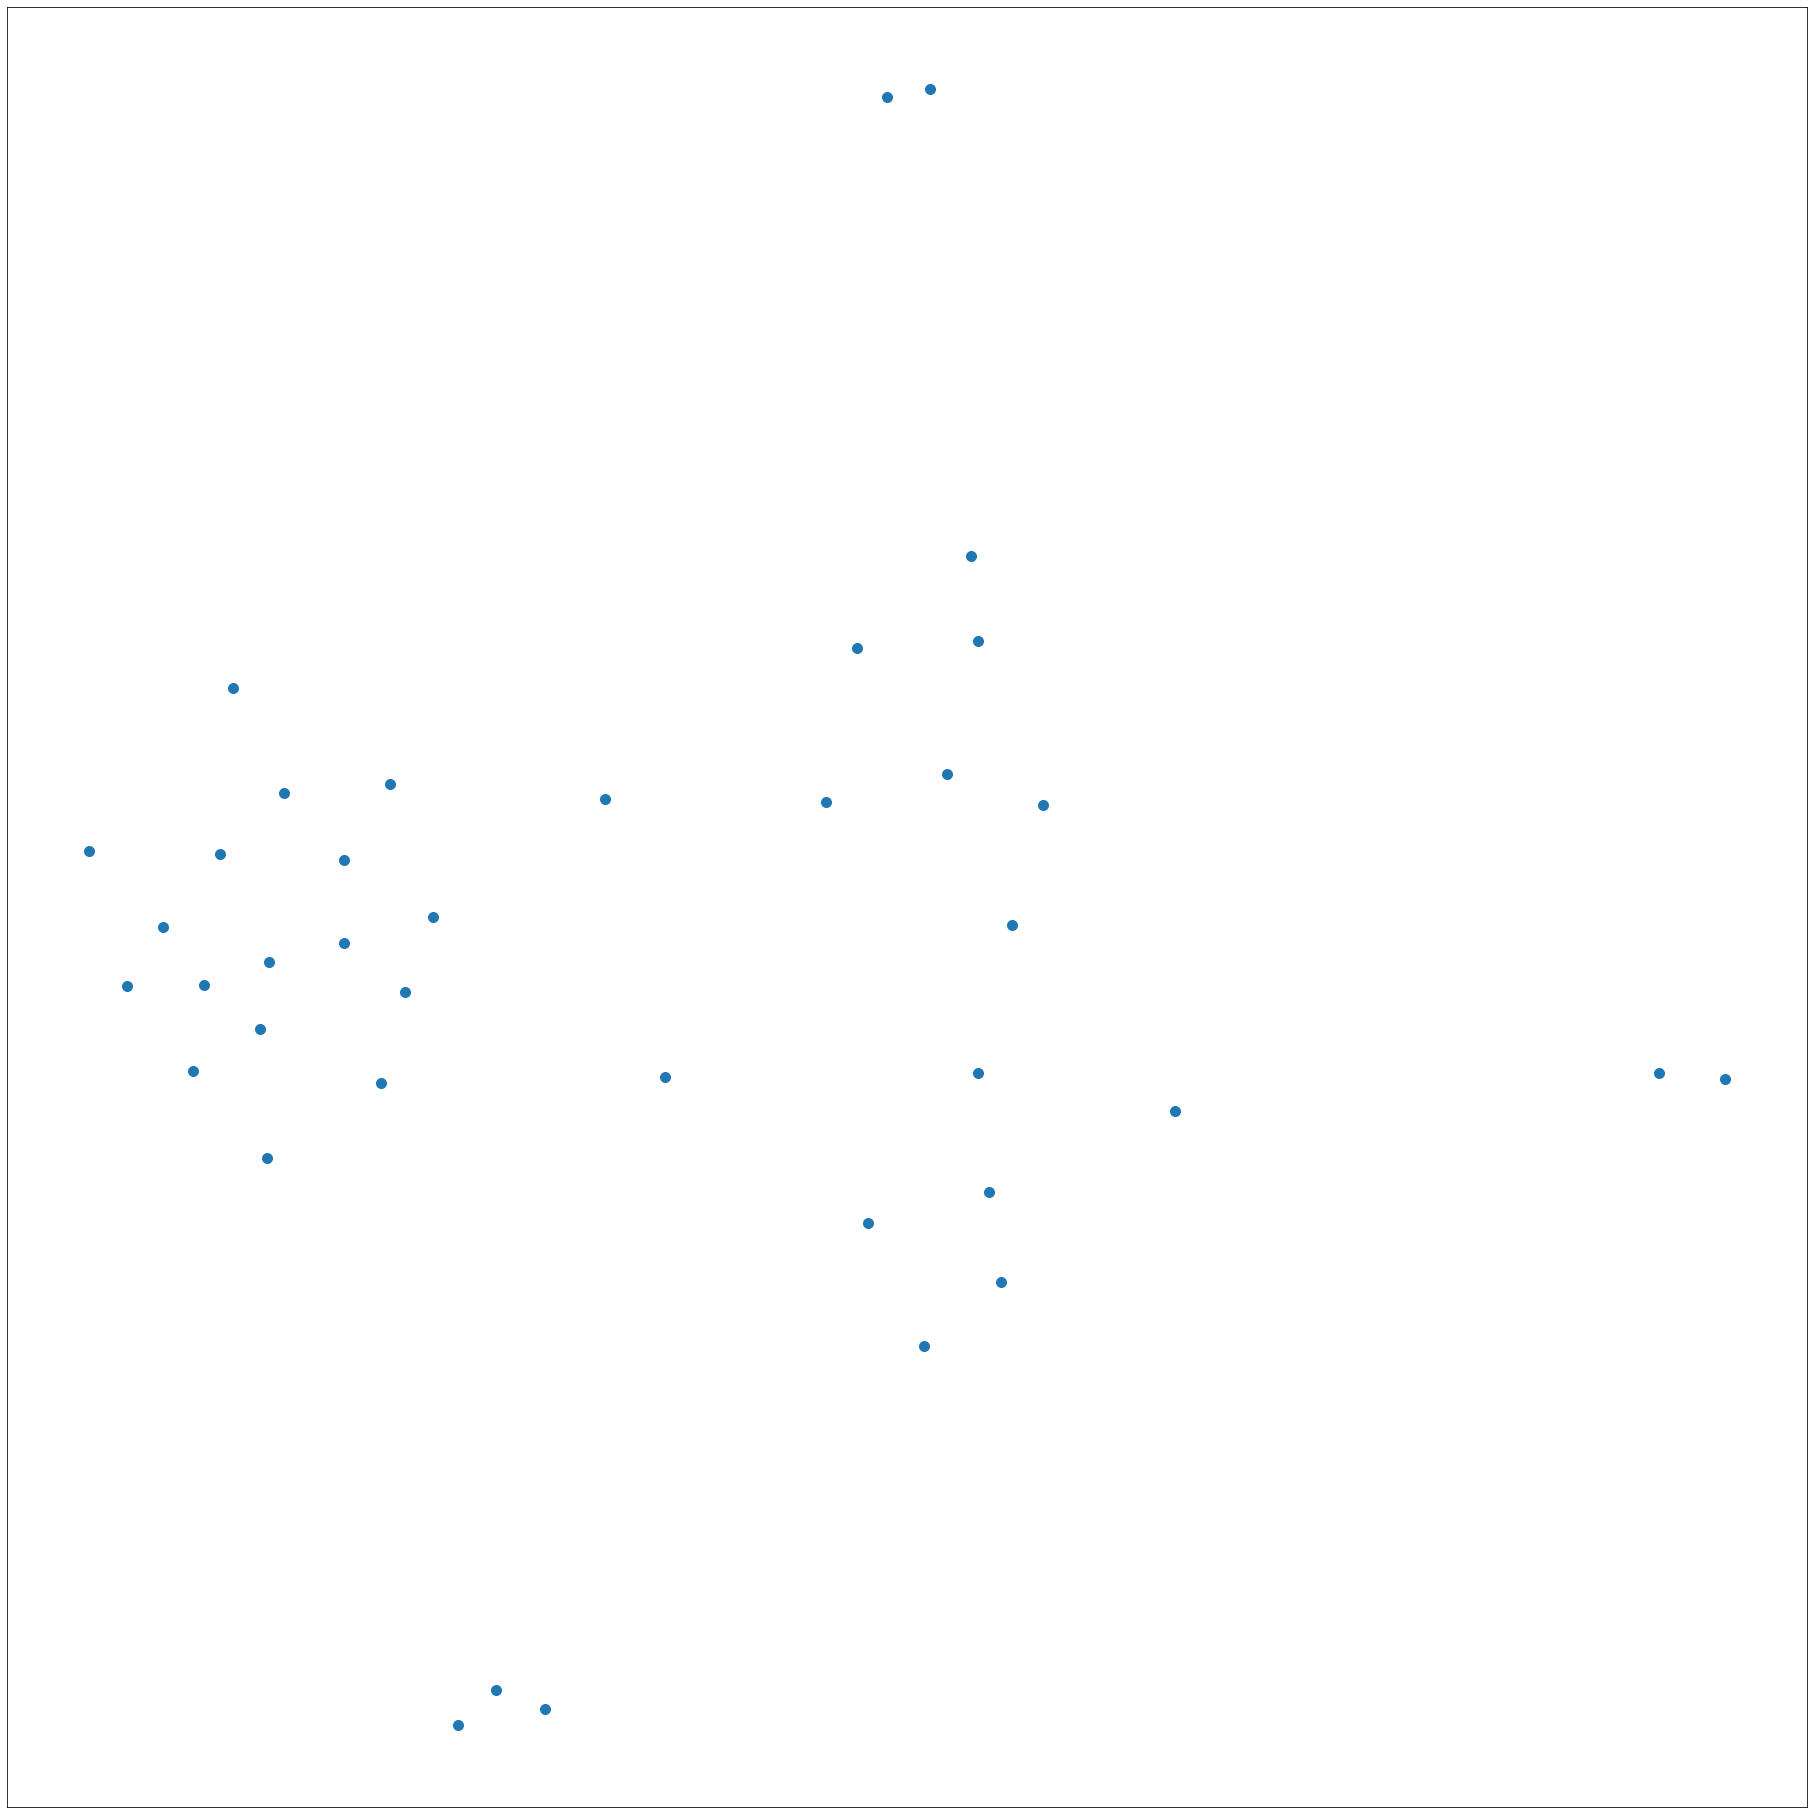

In [81]:
#NETWORK OF TRUCK ROUTES FOR THE CENTRAL ZONE - ZONE : 0
plt.figure(3,figsize=(25,25)) 

nx.draw(G_Central, with_labels=True,node_size=100,font_size=18)
plt.show()

In [82]:
#Implementing Bellman Ford for Central Zone
source = "mathura road faridabad, faridabad, haryana"
destination = "air force, gurgaon, haryana"



if(source in G_Central.nodes) and (destination in G_Central.nodes):
  DestPath,Parents = BellmanFord(G_Central,source,destination)

  print("Path taken from Source to Destination in the given graph")
  print(DestPath[0],end="")
  for i in range(1,len(DestPath)):
    print("--->",DestPath[i],end="")

else:
  print("Source or Destination not a part of the graph")

Path taken from Source to Destination in the given graph
mathura road faridabad, faridabad, haryana---> atali, faridabad, haryana---> air force, gurgaon, haryana

#### Graph where the Source and Destinations of the truck routes are not in the same Zone (Inter-Zonal)

In [83]:
#Initialising list for Inter Zone
Origin_Inter = []
Origin_Latitude_Inter = []
Origin_Longitude_Inter = []
Destination_Inter = []
Destination_Latitude_Inter = []
Destination_Longitude_Inter = []
Origin_Zones_Inter = []
Destination_Zones_Inter = []

In [84]:
#Gathering relevant data points from the superset data
for i in range(len(Origin)):
  if(Origin_Zones[i] != Destination_Zones[i]):
    Origin_Inter.append(Origin[i])
    Origin_Latitude_Inter.append(Origin_Latitude[i])
    Origin_Longitude_Inter.append(Origin_Longitude[i])
    Destination_Inter.append(Destination[i])
    Destination_Latitude_Inter.append(Destination_Latitude[i])
    Destination_Longitude_Inter.append(Destination_Longitude[i])
    Origin_Zones_Inter.append(Origin_Zones[i])
    Destination_Zones_Inter.append(Destination_Zones[i])

print(Origin_Inter[0:10],"\n\n",Origin_Zones_Inter[0:10])

['TVS LOGISTICS SERVICES LIMITED,LUCKNOW,UTTAR PRADESH', 'TVSLSL-JAMALPURL-HUB,GURGAON,HARYANA', 'TVSLSL-JAMALPURL-HUB,GURGAON,HARYANA', 'Jamalpur, Gurgaon, Haryana', 'Khorajnanoda, Ahmedabad, Gujarat', 'Singaperumalkoil, Kanchipuram, Tamil Nadu', 'Khorajnanoda, Ahmedabad, Gujarat', 'Anekal, Bangalore, Karnataka', 'Jamalpur, Gurgaon, Haryana', 'Jamalpur, Gurgaon, Haryana'] 

 [3, 3, 3, 3, 2, 1, 2, 1, 3, 3]


In [85]:
Graph_list_Inter = []
for i in range(len(Origin_Inter)):
    val = []
    if (Origin_Latitude_Inter[i] != Destination_Latitude_Inter[i]) and (Origin_Longitude_Inter[i] != Destination_Longitude_Inter[i]) and (Origin_Inter[i] != Destination_Inter[i]):
        distance = 0.0
        Org = Origin_Inter[i] #+ " (" + Zones[Origin_Zones_Inter[i]] + ")"
        val.append(Org.lower())
        val.append(float(Origin_Latitude_Inter[i]))
        val.append(float(Origin_Longitude_Inter[i]))
        Des = Destination_Inter[i] #+ " (" + Zones[Destination_Zones_Inter[i]]+ ")"
        val.append(Des.lower())
        val.append(float(Destination_Latitude_Inter[i]))
        val.append(float(Destination_Longitude_Inter[i]))
        distance = math.sqrt(math.pow(float(Origin_Longitude_Inter[i])-float(Destination_Longitude_Inter[i]),2)+math.pow(float(Origin_Latitude_Inter[i])-float(Destination_Latitude_Inter[i]),2))
        val.append(distance)
        Graph_list_Inter.append(val)

In [86]:
G_Inter = nx.Graph()


for i in range(len(Graph_list_Inter)):
  G_Inter.add_edge(Graph_list_Inter[i][0],Graph_list_Inter[i][3],weight=Graph_list_Inter[i][6])

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

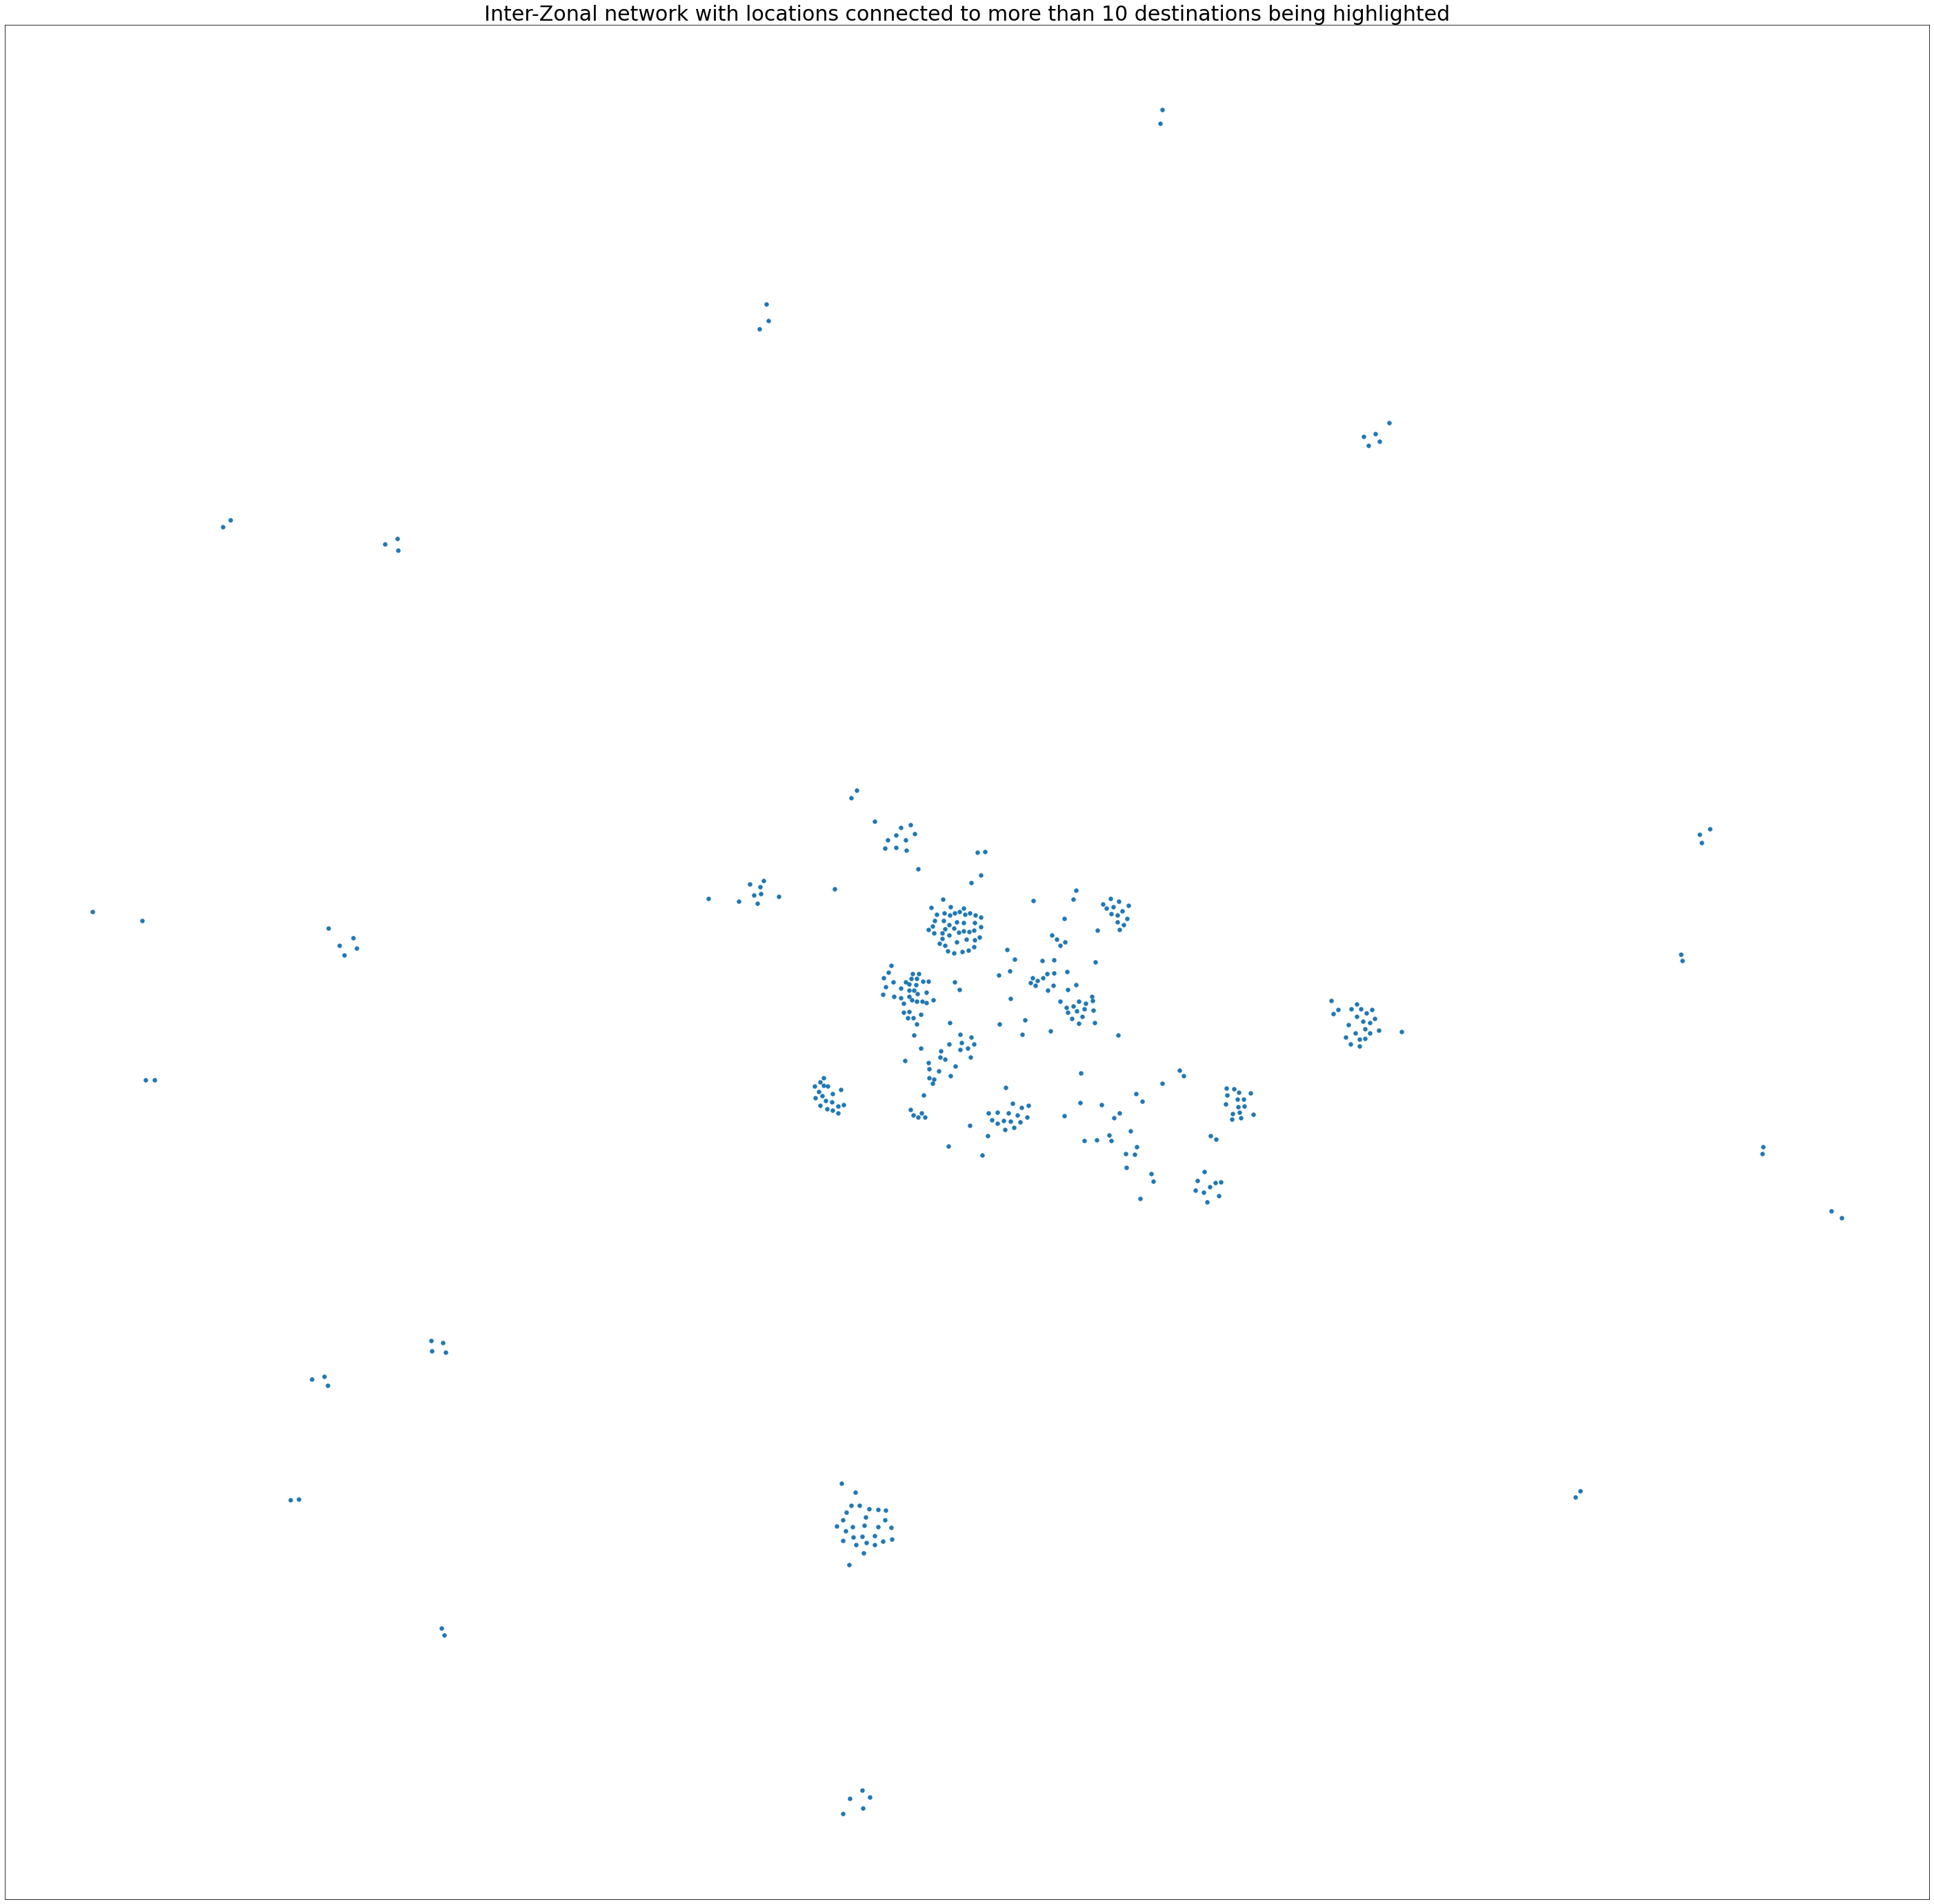

In [87]:
pos = nx.spring_layout(G_Inter)
labels = {
    n: (n
        if (len(list(nx.all_neighbors(G_Inter, n))) >= 10) and (n in pos)
        else '')
    for n in pos
}

#NETWORK OF INTERZONAL TRUCK ROUTES
plt.figure(3,figsize=(50,50))
plt.title("Inter-Zonal network with locations connected to more than 10 destinations being highlighted",fontsize=30)
nx.draw(G_Inter, with_labels=True,labels=labels,node_size=30,font_size=18)
plt.show()

In [ ]:
#Implementing Bellman Ford for InterZonal Routes
source = "tvslsl-puzhal-hub,chennai,tamil nadu"
destination = "ashok leyland plant 2-hosur,hosur,karnataka"



if(source in G_Inter.nodes) and (destination in G_Inter.nodes):
  DestPath,Parents = BellmanFord(G_Inter,source,destination)

  print("Path taken from Source to Destination in the given graph")
  print(DestPath[0],end="")
  for i in range(1,len(DestPath)):
    print("--->",DestPath[i],end="")

else:
  print("Source or Destination not a part of the graph")

## **Linear Programming**

### 4. Minimum Vertex Cover

In [88]:
#Package Required to run code related to Linear Programming
#%pip install pulp

In [89]:
from pulp import * 
import networkx as nx

#A Function that returns the minimum number of Service centers that need to be opened so that there is immediate service available to truck en route
#using the concept of Minimum Vertex Cover.
def NumberofServiceCenter(G):
    #each node of the graph becomes a variable
    vertexlist = []
    for i in G.nodes:
      val1 = i.replace(" ","_")
      val = val1.replace("-","_")
      vertexlist.append(i)

    #define the LP - objective of the code is to minimize the sum of the vertex
    prob_integer = LpProblem(name="MVC", sense=LpMinimize)
    #print(type(prob_integer))

    # variables
    VertexVariables = []
    for i in range(len(vertexlist)):
        VertexVariables.append(LpVariable(vertexlist[i],lowBound=0, upBound=1, cat="Integer"))
        
    #print(VertexVariables[0].name)

    for e in G.edges:
        a = None
        b = None
        for i in range(len(VertexVariables)):
            e0_1 = e[0].replace(" ","_")
            e0 = e0_1.replace("-","_")
            e1_1 = e[1].replace(" ","_")
            e1 = e1_1.replace("-","_")
            if e0 == VertexVariables[i].name:
                a = VertexVariables[i]
            if e1 == VertexVariables[i].name:
                b = VertexVariables[i]
            
        prob_integer += a + b >= 1
    
    prob_integer += sum(VertexVariables)
    
    #solve 
    status = prob_integer.solve()
    #value of solution
    value(prob_integer.objective)
    #print(prob_integer)
    #print(status)

        
    return int(value(prob_integer.objective))

In [90]:
#Number of Service Center required Nationwide
print("Number of Centers required accross the country and by Zone")
Nationwide_SC = NumberofServiceCenter(G)
print("Nationwide:\t",Nationwide_SC)

#Number of Service Center required in the East Zone
East_SC = NumberofServiceCenter(G_East)
print("East Zone:\t",NumberofServiceCenter(G_East))

#Number of Service Center required in the South Zone
South_SC = NumberofServiceCenter(G_South)
print("South Zone:\t",NumberofServiceCenter(G_South))

#Number of Service Center required in the West Zone
West_SC = NumberofServiceCenter(G_West)
print("West Zone:\t",NumberofServiceCenter(G_West))

#Number of Service Center required in the North Zone
North_SC = NumberofServiceCenter(G_North)
print("North Zone:\t",NumberofServiceCenter(G_North))

#Number of Service Center required in the Central Zone
Central_SC = NumberofServiceCenter(G_Central)
print("Central Zone:\t",NumberofServiceCenter(G_Central))

#Number of Inter Zonal Service Centers required 
InterZonal_SC = NumberofServiceCenter(G_Inter)
print("Inter Zonal:\t",NumberofServiceCenter(G_Inter))

Number of Centers required accross the country and by Zone
Nationwide:	 135
East Zone:	 36
South Zone:	 27
West Zone:	 11
North Zone:	 10
Central Zone:	 10
Inter Zonal:	 75


There is a stark difference in the number of Service Centers between the nationwide network and the sum of the service centers of all of the zones.

This is because the nationwide network is more dense as it has interzonal routes and this can be used to further reduce the number of service centers that need to be set up accross around the country.



# **Graph Theory - Visualize the paths between N centers**

In [91]:
Cities_to_visit = ['tvslsl-puzhal-hub,chennai,tamil nadu','kanchipuram,tamil nadu lucas tvs ltd-pondy,pondy,pondicherry','karnataka tvslsl-puzhal-hub,chennai,tamil nadu', 'ashok leyland plant 1- hosur,hosur,karnataka','ashok leyland plant 2-hosur,hosur,karnataka', 'lucas tvs ltd-pondy,pondy,pondicherry', 'daimler india commercial vehicles,kanchipuram,tamil nadu']


In [92]:
TS = nx.Graph()
dist = 0
i = 0
arr = [[None]*len(Cities_to_visit)]*len(Cities_to_visit)
arq = [[None]*len(Cities_to_visit)]*len(Cities_to_visit)
end=''
for i in range(len(Cities_to_visit)):
  j = 0
  for j in range(len(Cities_to_visit)):
    k = 0
    for k in range(len(Graph_list)): #1245
      if((Cities_to_visit[i] == Graph_list[k][0] and Cities_to_visit[j] == Graph_list[k][3]) or (Cities_to_visit[j] == Graph_list[k][0] and Cities_to_visit[i] == Graph_list[k][3])):
        dist = Graph_list[k][6]
        TS.add_edge(Cities_to_visit[i],Cities_to_visit[j],weight = int(dist))
        arr[i][j] = dist
      if (Cities_to_visit[i] == Graph_list[k][0] or Cities_to_visit[i] == Graph_list[k][3]):
        if(Cities_to_visit[i] == Graph_list[k][0]):
          lat_start = Graph_list[k][1]
          long_start = Graph_list[k][2]
          start = Graph_list[k][0]
        else:
          lat_start = Graph_list[k][4]
          long_start = Graph_list[k][5]
      if (Cities_to_visit[j] == Graph_list[k][0] or Cities_to_visit[j] == Graph_list[k][3]):
        if(Cities_to_visit[i] == Graph_list[k][0]):
          lat_end = Graph_list[k][1]
          long_end = Graph_list[k][2]
        else:
          lat_end = Graph_list[k][4]
          long_end = Graph_list[k][5]
          end = Graph_list[k][3]
      if(i == j):
        arq[i][j] = 0
      else:
        arq[i][j] = math.sqrt(pow((lat_start- lat_end),2) + pow((long_start - long_end),2))

    
    


AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

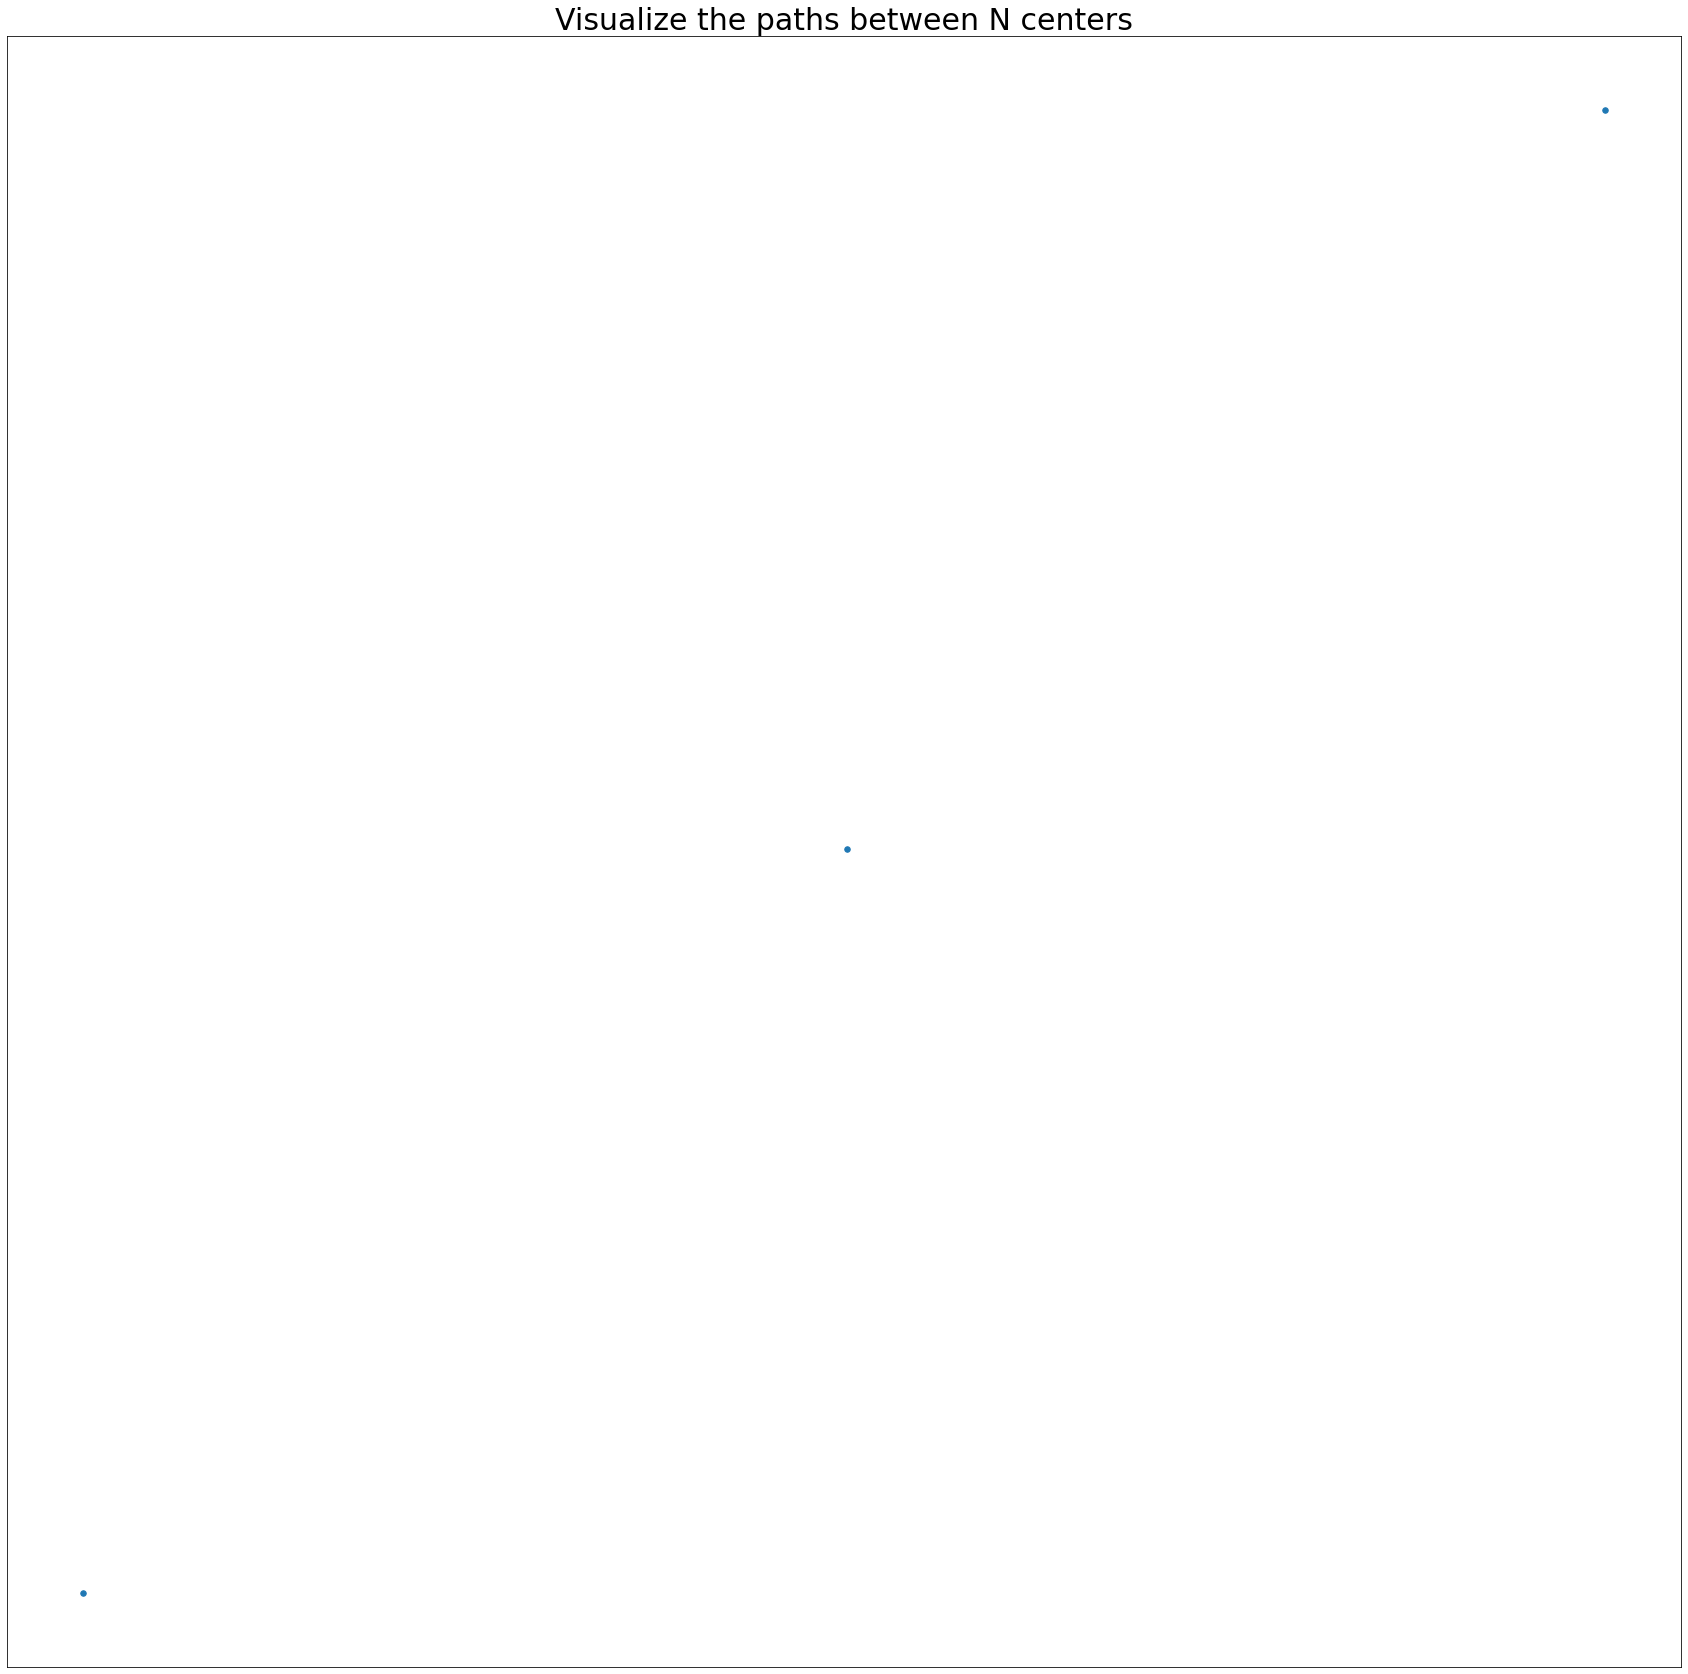

In [93]:
plt.figure(3,figsize=(30,30)) 
plt.title("Visualize the paths between N centers",fontsize=30)
nx.draw(TS, with_labels=True,node_size=30,font_size=20)
plt.show()

In [94]:
# from networkx.generators.geometric import euclidean
#oneStep=nx.to_numpy_matrix(TS)
#print(oneStep)
ajj = arr
# print(ajj)

# for i in range(0,len(arr)):
#   for j in range (0,len(arr)):
#     if ajj[i][j] == None:
#       ajj[i][j] = 1000
# # print(ajj)
# #print(arq)

# **Dynamic Programming(Travelling Sales Person) - to Find out the distance an inpection officer will have to go through to inpect all the centers**

In [95]:
from sys import maxsize
from itertools import permutations
V = 4
 
def TSP_DP(graph, s):
    vertex = []
    for i in range(V):
        if i != s:
            vertex.append(i)
    min_path = maxsize
    next_permutation=permutations(vertex)
    for i in next_permutation:
        current_pathweight = 0
        k = s
        for j in i:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]
        min_path = min(min_path, current_pathweight)
         
    return min_path
 
 

In [96]:
TSP_DP(arq, 1)

7.025894960786171

# Exploratory Data Analysis

Graphical Representation of the derived Inferences

#### Number of Locations in Each Zone

In [97]:
East = len(Labelled_df[Labelled_df["Zone"]=="East"])
South = len(Labelled_df[Labelled_df["Zone"]=="South"])
West = len(Labelled_df[Labelled_df["Zone"]=="West"])
North = len(Labelled_df[Labelled_df["Zone"]=="North"])
Central = len(Labelled_df[Labelled_df["Zone"]=="Central"])


ZoneCounts = [East, South, West, North, Central]

ZoneCounts

[746, 1895, 739, 738, 393]

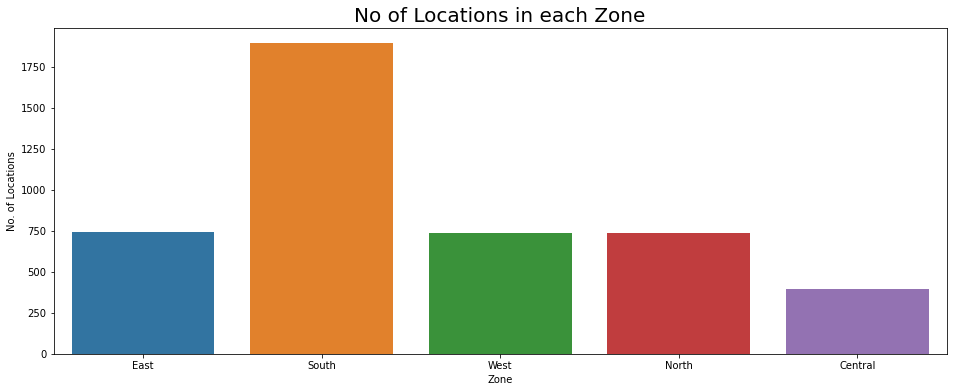

In [98]:
plt.figure(figsize=(16,6))
sns.barplot(x=Zones,y=ZoneCounts)
plt.title("No of Locations in each Zone",fontsize=20)
plt.xlabel("Zone")
plt.ylabel("No. of Locations")
plt.show()

#### Number of Proposed Serviced Centers. With and Without Inclusion of InterZonal centers

In [99]:
SC_Zones = ['East','South','West','North','Central','InterZonal']   
SC_numbers = [East_SC,South_SC,West_SC,North_SC,Central_SC,InterZonal_SC]
data = []
for i in range(len(SC_Zones)):
  val = []
  val.append(SC_Zones[i])
  val.append(SC_numbers[i])
  data.append(val)

ServiceCenter_DF = pd.DataFrame(data,columns=["Zone","ServiceCenters"])
ServiceCenter_DF

Zone  ServiceCenters
0        East              36
1       South              27
2        West              11
3       North              10
4     Central              10
5  InterZonal              75

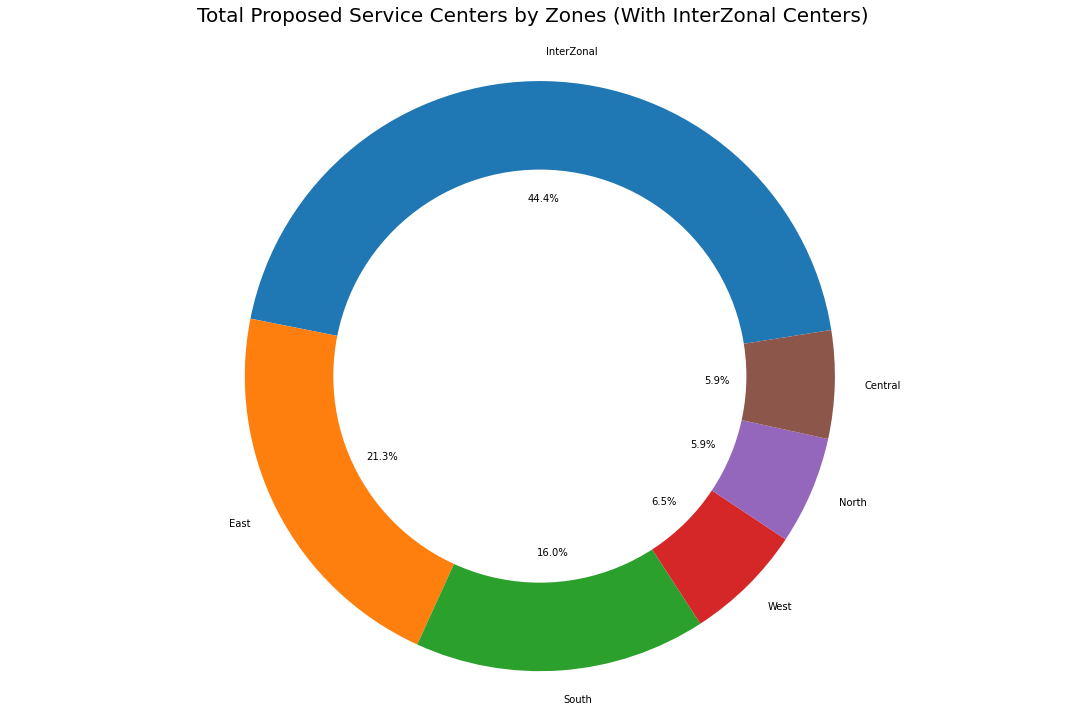

In [100]:
labels = list(ServiceCenter_DF.sort_values(by=['ServiceCenters'],ascending=False)['ServiceCenters'].head(10))

plt.figure(figsize= (15,10))
plt.pie(labels, labels=ServiceCenter_DF.sort_values(by=['ServiceCenters'],ascending=False).head(10).Zone, autopct='%1.1f%%', startangle=9)
centre_circle = plt.Circle((0,0),0.7,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Total Proposed Service Centers by Zones (With InterZonal Centers) \n',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [101]:
SC_Zones = ['East','South','West','North','Central']   
SC_numbers = [East_SC,South_SC,West_SC,North_SC,Central_SC]
data = []
for i in range(len(SC_Zones)):
  val = []
  val.append(SC_Zones[i])
  val.append(SC_numbers[i])
  data.append(val)

ServiceCenter2_DF = pd.DataFrame(data,columns=["Zone","ServiceCenters"])
ServiceCenter2_DF

Zone  ServiceCenters
0     East              36
1    South              27
2     West              11
3    North              10
4  Central              10

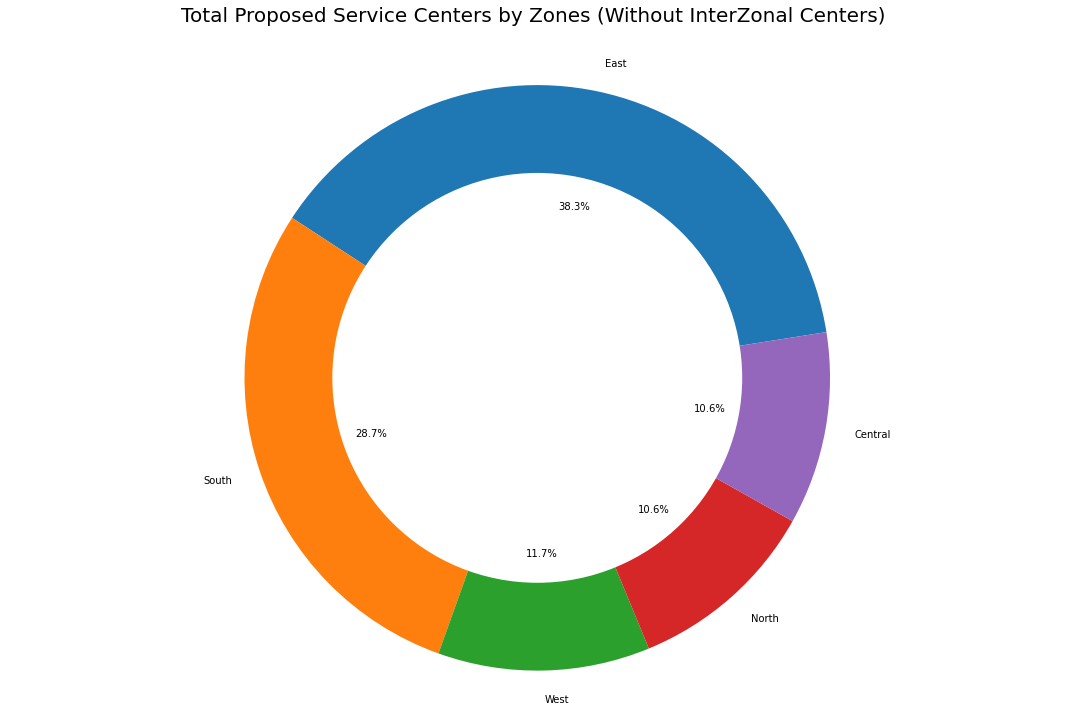

In [102]:
labels = list(ServiceCenter2_DF.sort_values(by=['ServiceCenters'],ascending=False)['ServiceCenters'].head(10))

plt.figure(figsize= (15,10))
plt.pie(labels, labels=ServiceCenter2_DF.sort_values(by=['ServiceCenters'],ascending=False).head(10).Zone, autopct='%1.1f%%', startangle=9)
centre_circle = plt.Circle((0,0),0.7,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Total Proposed Service Centers by Zones (Without InterZonal Centers) \n',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [103]:
NationalGraph_Edges = len(G.edges)
East_edges = len(G_East.edges)
South_edges = len(G_South.edges)
West_edges = len(G_West.edges)
North_edges = len(G_North.edges)
Central_edges = len(G_Central.edges)
InterZonal_edges = len(G_Inter.edges)

SC_Zones = ['East','South','West','North','Central','InterZonal']   
Edge_numbers = [East_edges,South_edges,West_edges,North_edges,Central_edges,InterZonal_edges]
data = []
for i in range(len(SC_Zones)):
  val = []
  val.append(SC_Zones[i])
  val.append(Edge_numbers[i])
  data.append(val)

Route_DF = pd.DataFrame(data,columns=["Zone","Routes"])
Route_DF

Zone  Routes
0        East     192
1       South     139
2        West      45
3       North      41
4     Central      41
5  InterZonal     410

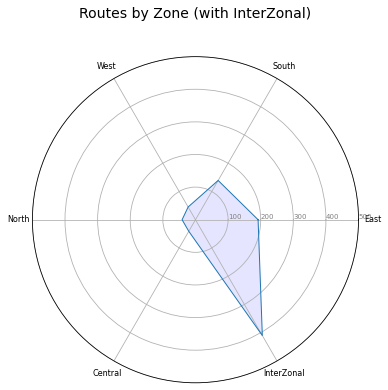

In [104]:
from math import pi
idx = 1
plt.figure(figsize=(6,6))

# number of variable
categories=Route_DF.Zone
N = len(SC_Zones)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = list(Route_DF.Routes)
values += values[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(1, 1, idx, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='black', size=8)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([100,200,300,400,500], ["100","200","300","400","500"], color="grey", size=7)
plt.ylim(0,500)

plt.subplots_adjust(hspace = 0.5)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

plt.title("Routes by Zone (with InterZonal)", size=14, y=1.1)

idx += 1 

In [105]:
SC_Zones = ['East','South','West','North','Central']   
Edge_numbers = [East_edges,South_edges,West_edges,North_edges,Central_edges]
data = []
for i in range(len(SC_Zones)):
  val = []
  val.append(SC_Zones[i])
  val.append(Edge_numbers[i])
  data.append(val)

Route2_DF = pd.DataFrame(data,columns=["Zone","Routes"])
Route2_DF

Zone  Routes
0     East     192
1    South     139
2     West      45
3    North      41
4  Central      41

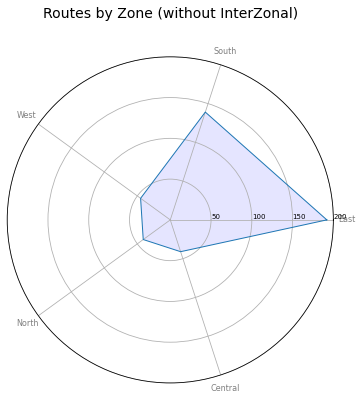

In [106]:
from math import pi
idx = 1
plt.figure(figsize=(6,6))

# number of variable
categories=Route2_DF.Zone
N = len(Route2_DF.Zone)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = list(Route2_DF.Routes)
values += values[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(1, 1, idx, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([50,100,150,200], ["50","100","150","200"], color="black", size=7)
plt.ylim(0,200)

plt.subplots_adjust(hspace = 0.5)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

plt.title("Routes by Zone (without InterZonal)", size=14, y=1.1)

idx += 1 

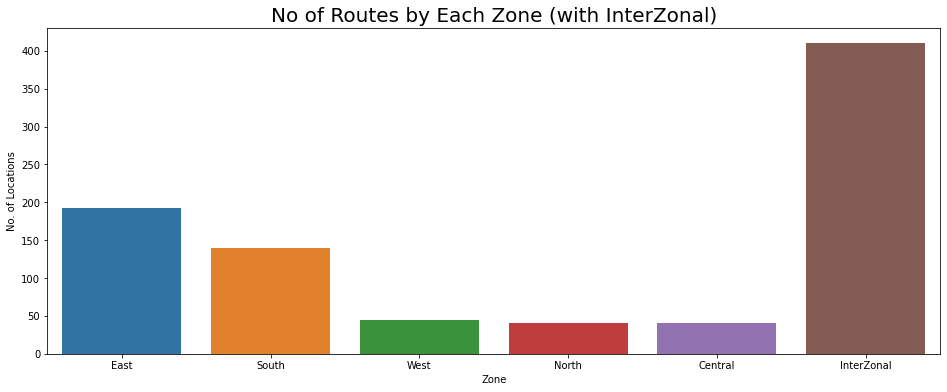

In [107]:
plt.figure(figsize=(16,6))
sns.barplot(x=Route_DF.Zone,y=Route_DF.Routes)
plt.title("No of Routes by Each Zone (with InterZonal)",fontsize=20)
plt.xlabel("Zone")
plt.ylabel("No. of Locations")
plt.show()

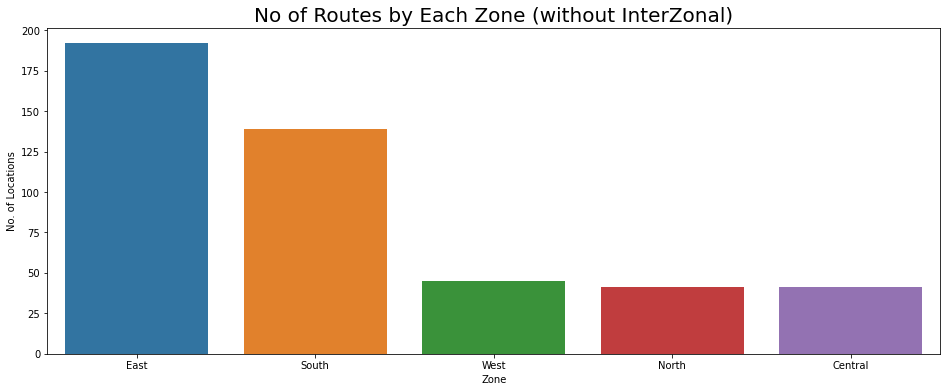

In [108]:
plt.figure(figsize=(16,6))
sns.barplot(x=Route_DF.Zone[:-1],y=Route_DF.Routes[:-1])
plt.title("No of Routes by Each Zone (without InterZonal)",fontsize=20)
plt.xlabel("Zone")
plt.ylabel("No. of Locations")
plt.show()